In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

In [3]:
path_f3 = '/Net/Groups/BSI/data/quincy/input/point/FLUXNET3/met_forcing/DE-Hai_t_1901-2012.dat'
path_f22 = '/Net/Groups/BSI/work_scratch/ppapastefanou/quincy_fluxet22_1.0/transient/DE-Hai_t_1901-2021.dat'
path_f24 = '/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/QUINCY_DE-Hai_1901_2024.dat'

In [4]:
cols = ['swvis_srf_down', 'lw_srf_down', 't_air', 'q_air',
       'press_srf', 'rain', 'snow', 'wind_air']

cols_all = ['swvis_srf_down', 'lw_srf_down', 't_air',
       'q_air', 'press_srf', 'rain', 'snow', 'wind_air', 'co2_mixing_ratio',
       'co2_dC13', 'co2DC14', 'nhx_srf_down', 'noy_srf_down', 'p_srf_down']

In [5]:
df_f3 = pd.read_csv(path_f3, sep='\s+', index_col=None, skiprows=[1])
df_f22 = pd.read_csv(path_f22, sep='\s+', index_col=None, skiprows=[1])
df_f24 = pd.read_csv(path_f24, sep='\s+', index_col=None, skiprows=[1])

In [6]:
df_f24[df_f24.isna().any(axis=1)].shape[0]

0

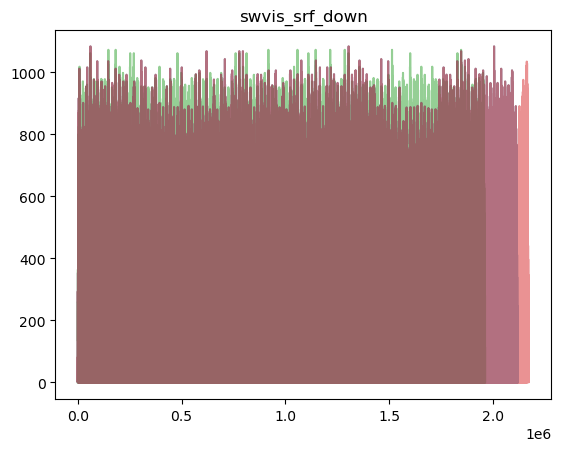

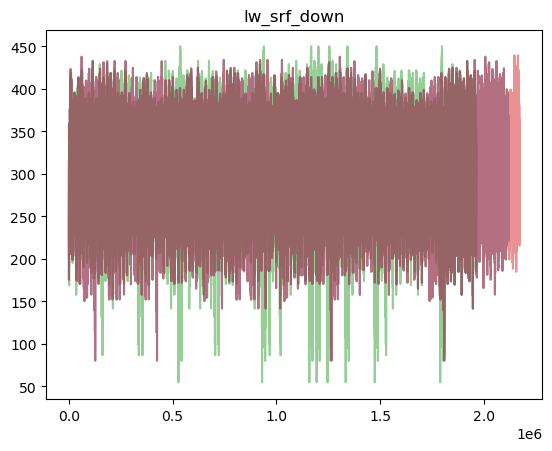

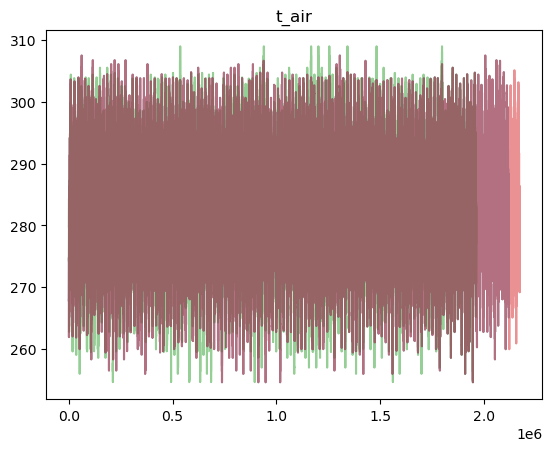

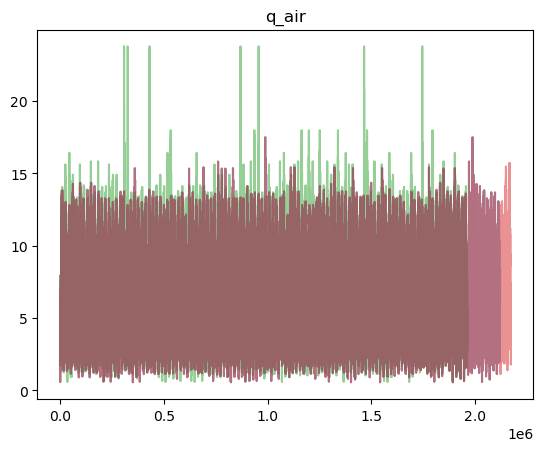

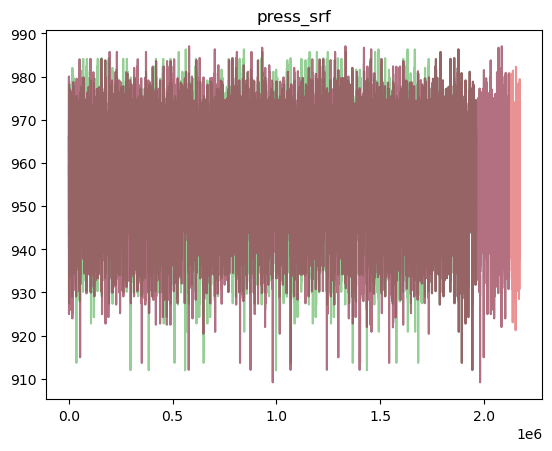

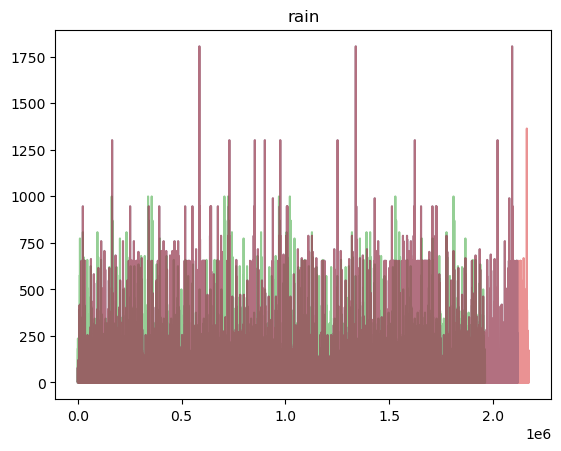

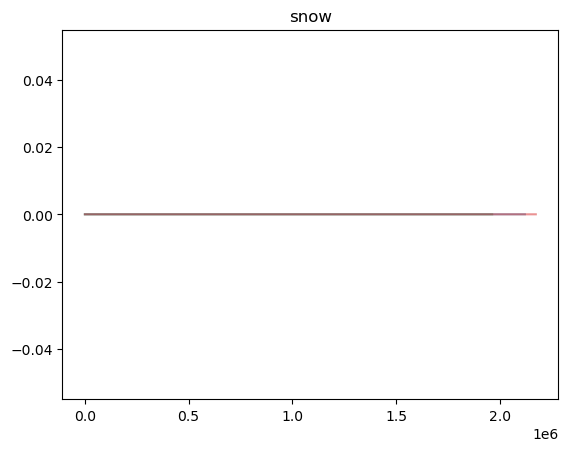

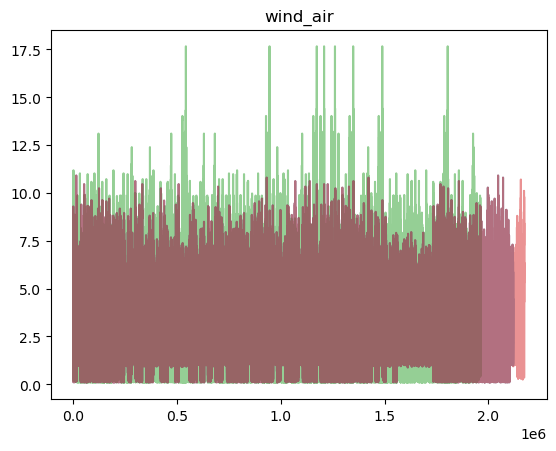

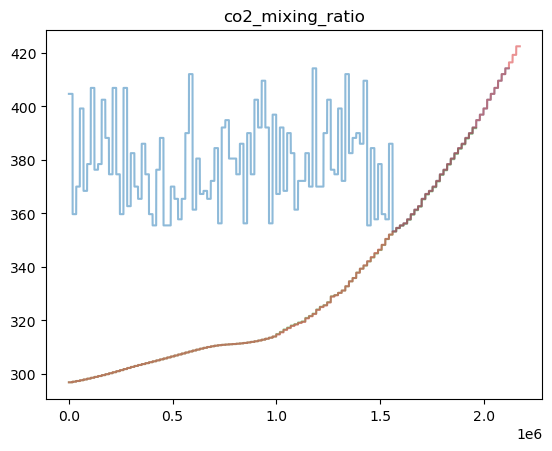

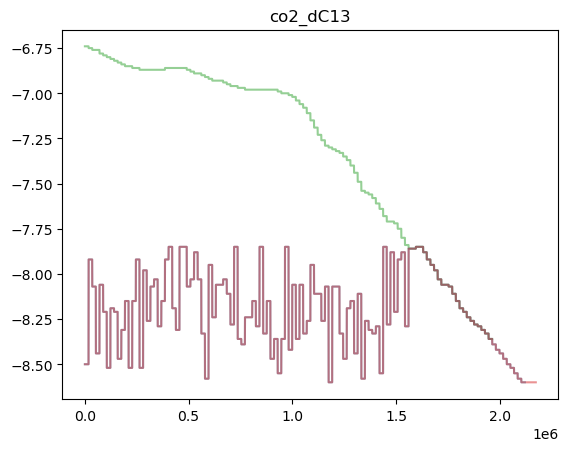

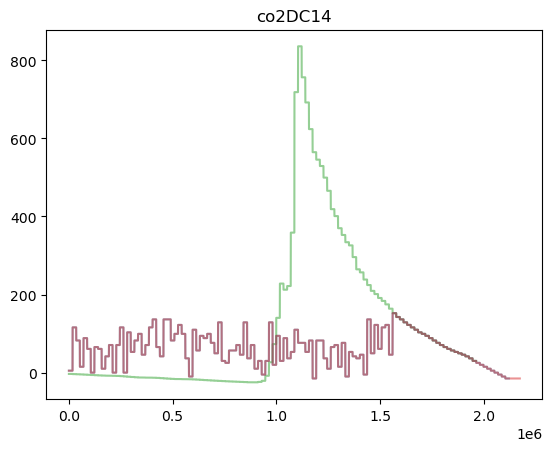

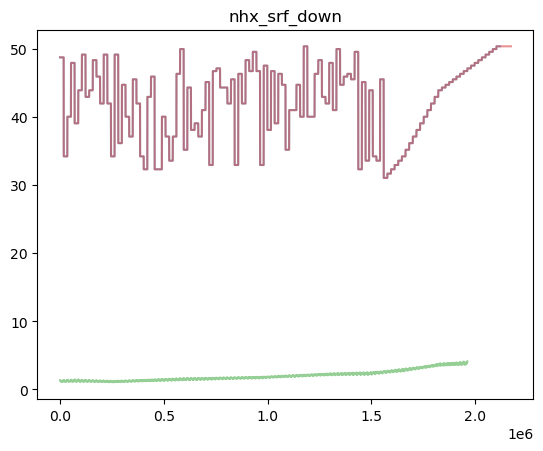

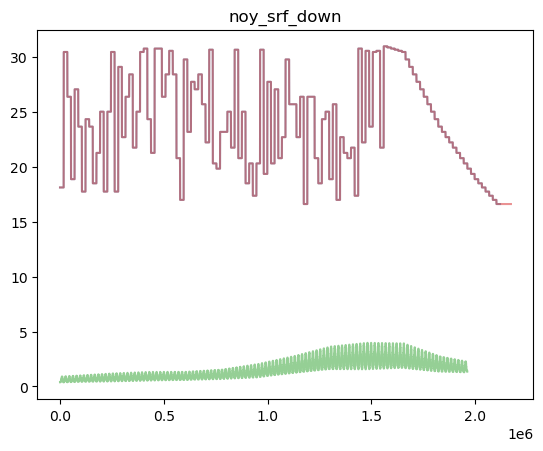

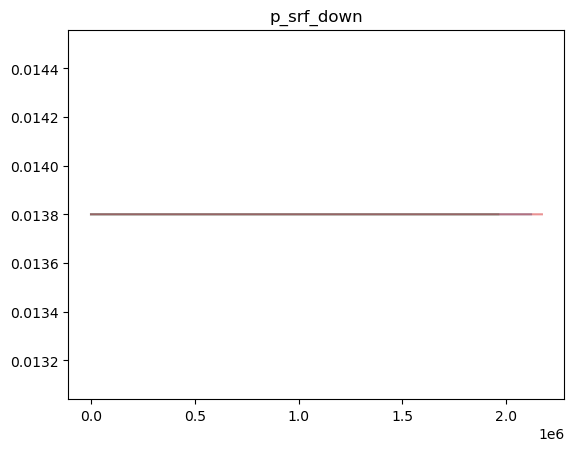

In [7]:
# df_f22 =df_f22[df_f22['year'] >= 1980]
# df_f3 =df_f3[df_f3['year'] >= 1980]
# df_f24 =df_f24[df_f24['year'] >= 1980]


for col in cols_all:
    
    plt.figure()
    plt.plot(df_f3[col], alpha =0.5, c= 'tab:green');
    plt.plot(df_f22[col], alpha = 0.5, c=  'tab:blue');
    plt.plot(df_f24[col], alpha = 0.5, c = 'tab:red');

    plt.title(col);
    plt.savefig(f"{col}_ts.png");

/tmp/ipykernel_2853918/2975743759.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


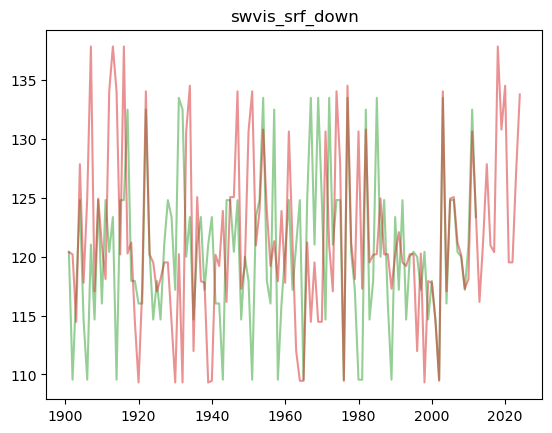

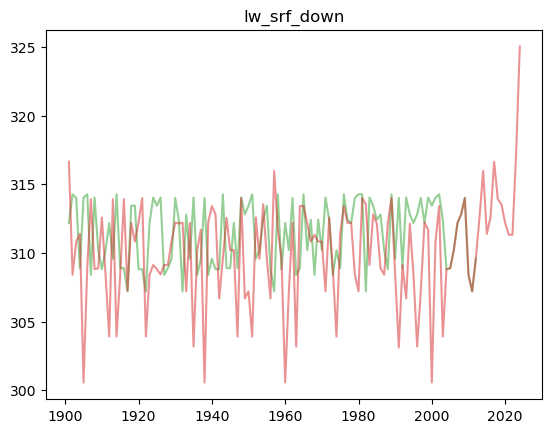

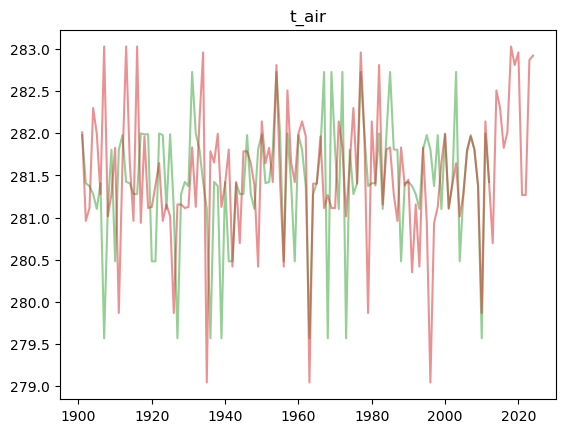

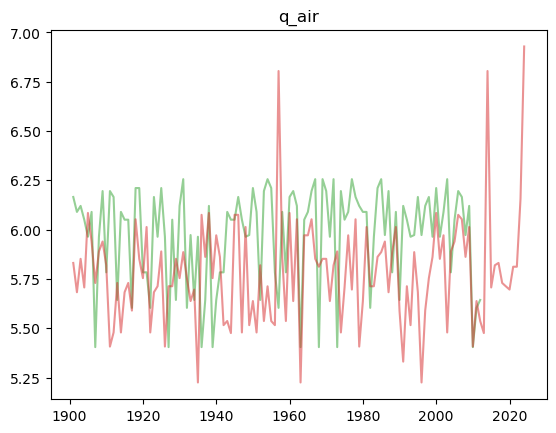

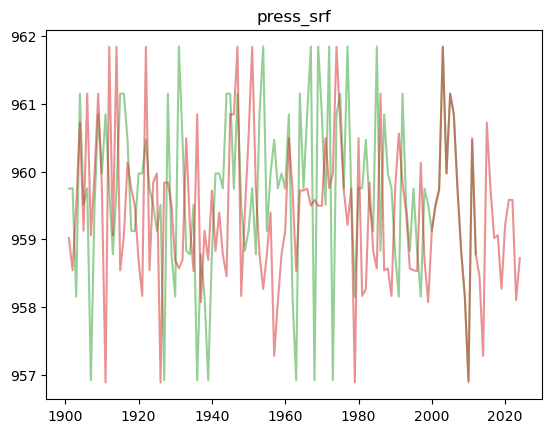

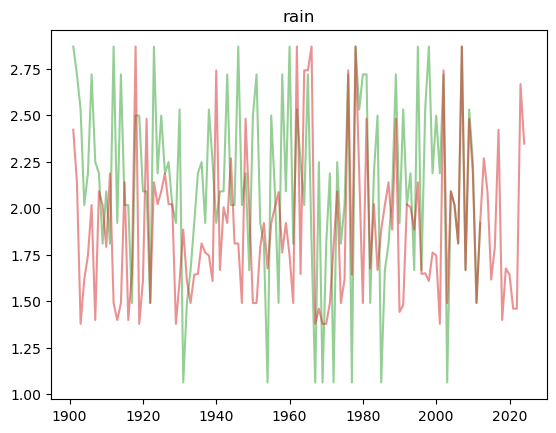

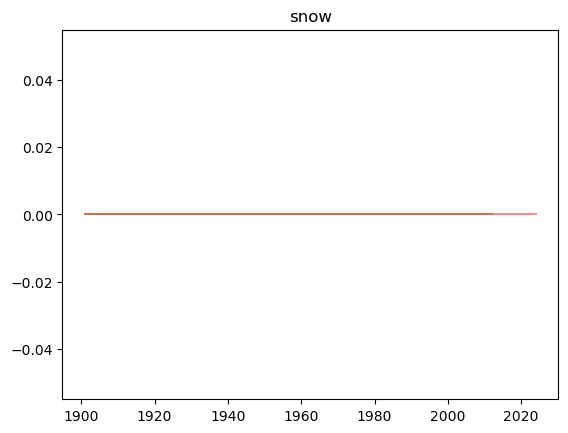

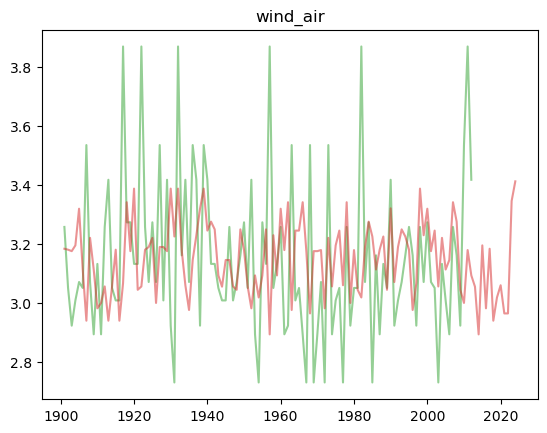

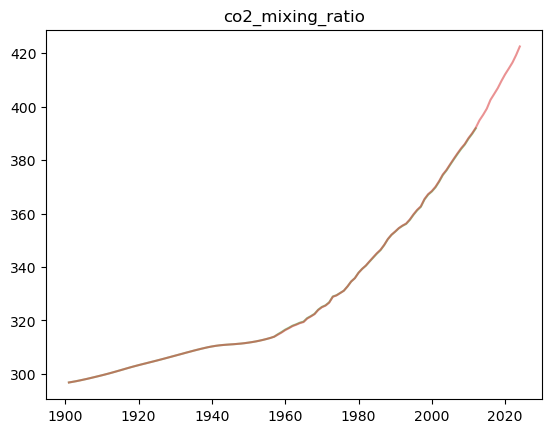

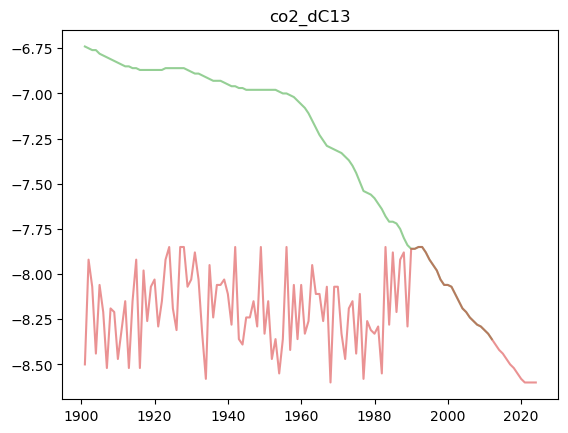

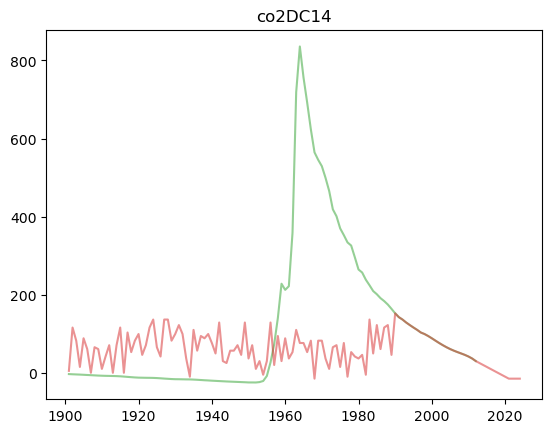

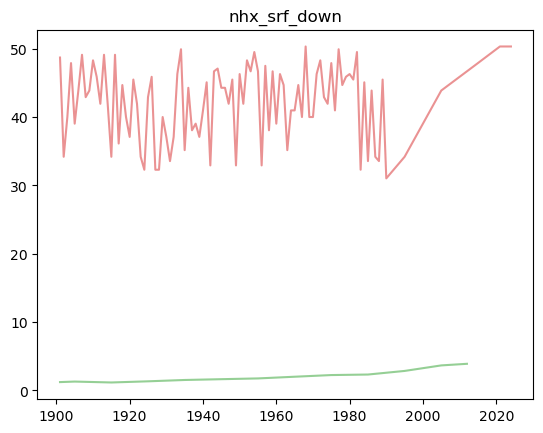

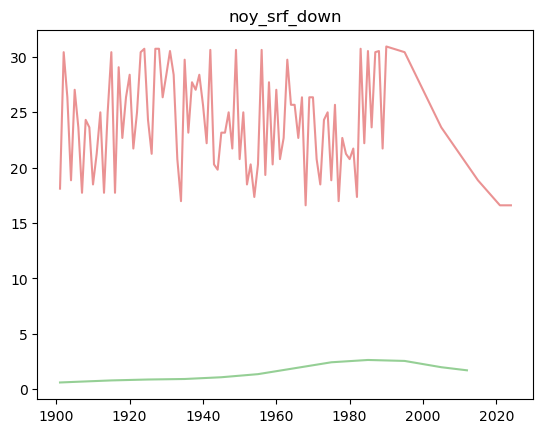

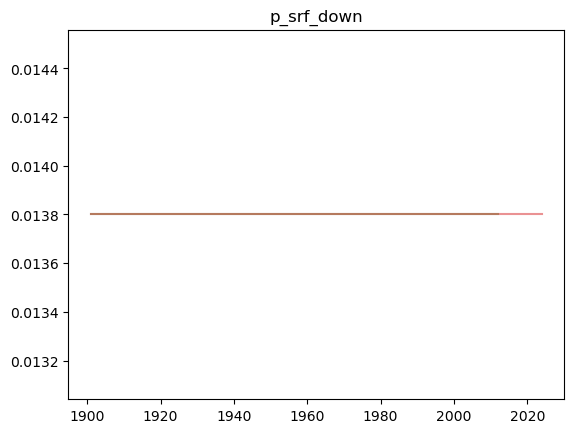

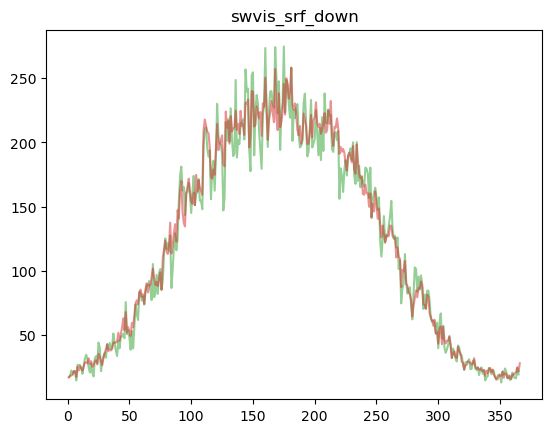

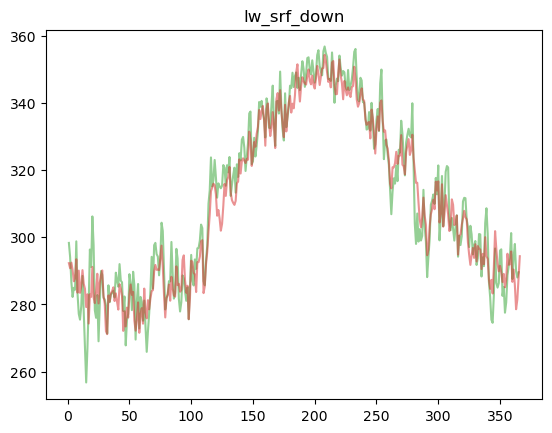

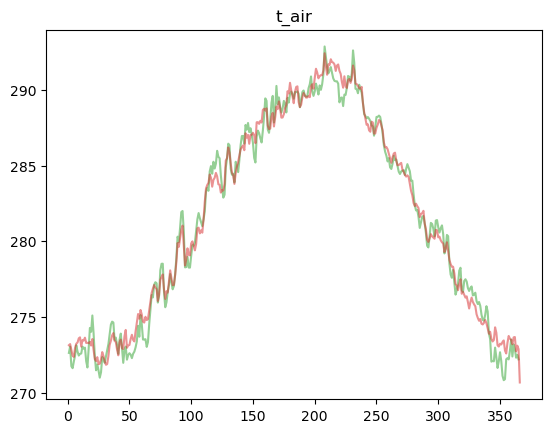

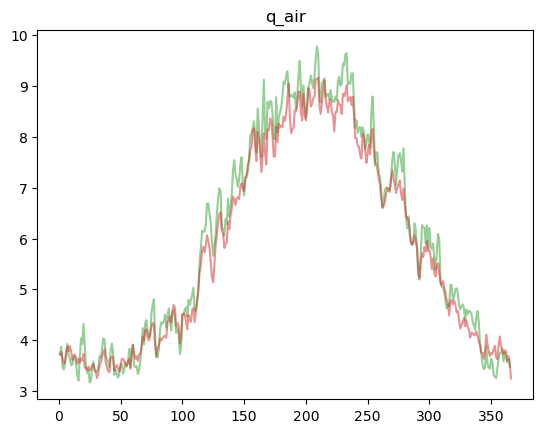

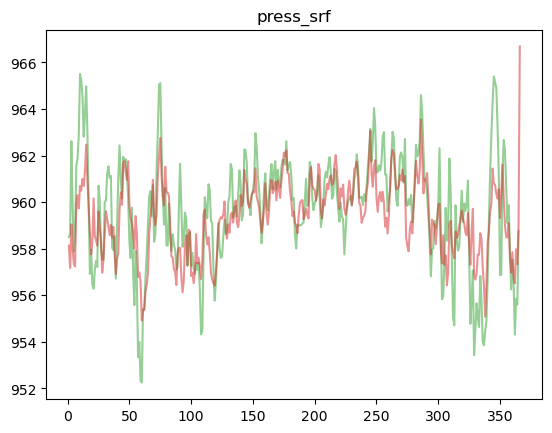

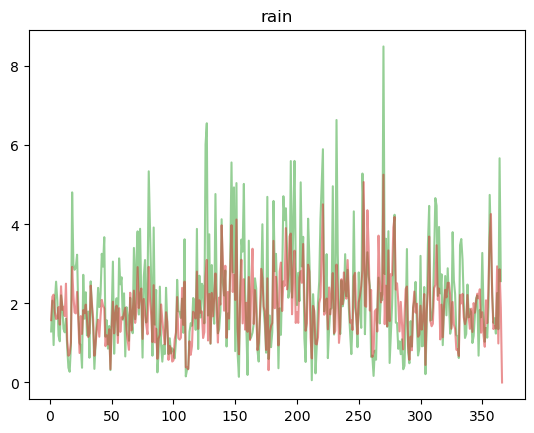

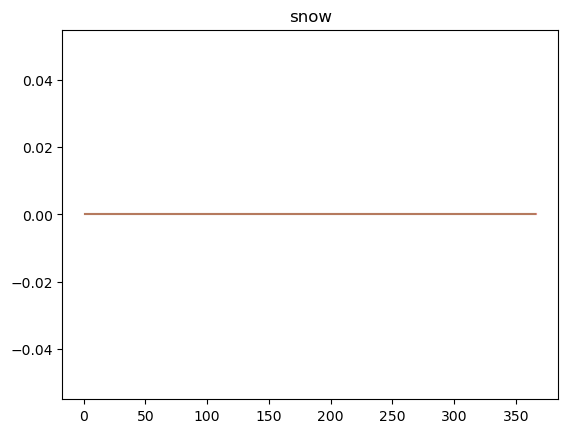

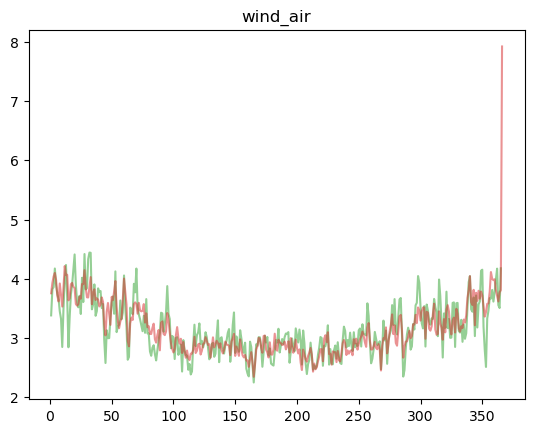

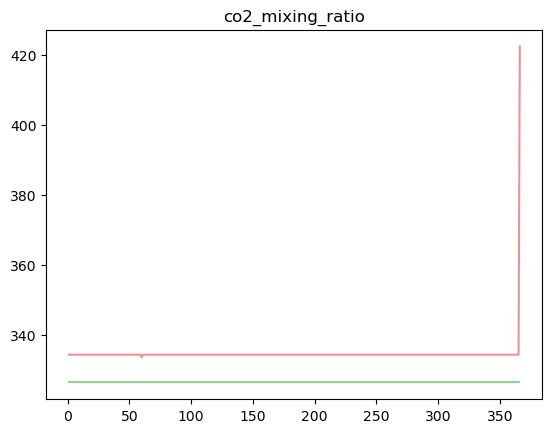

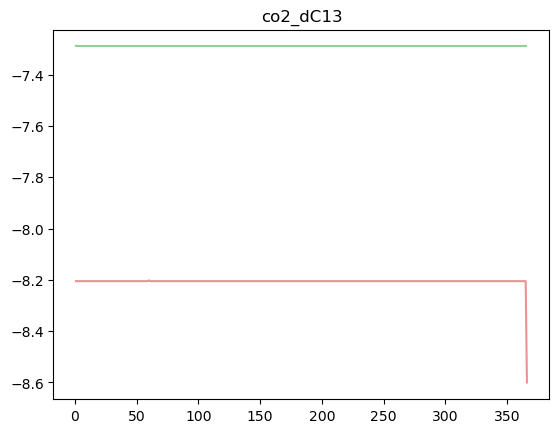

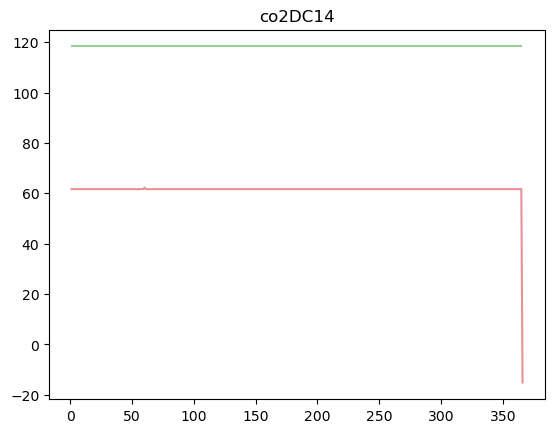

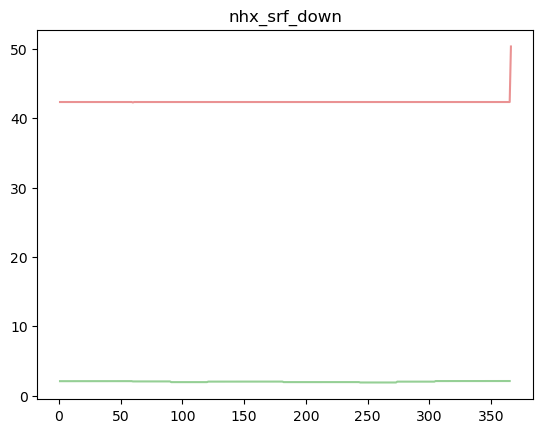

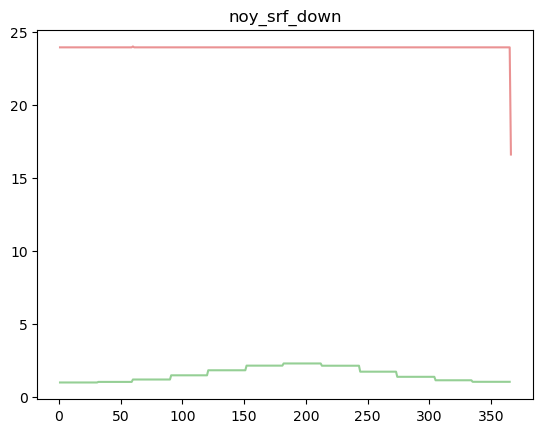

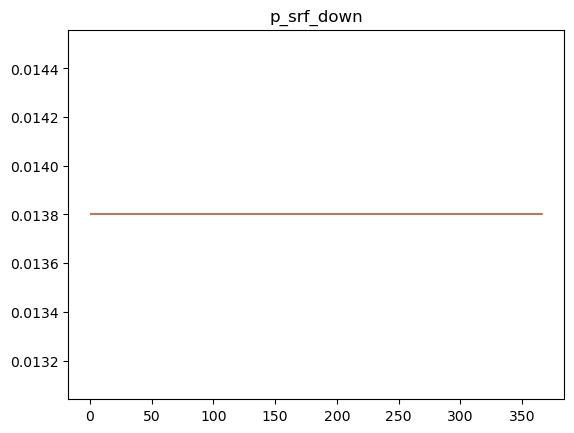

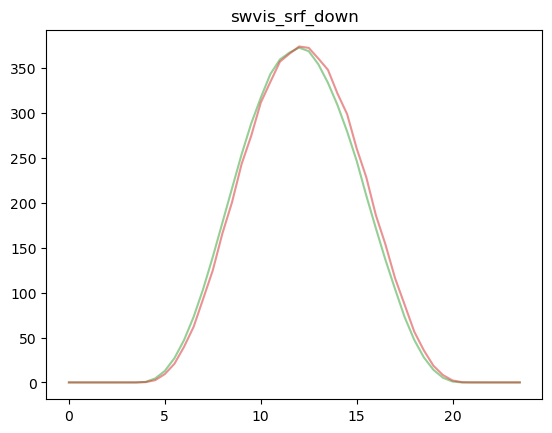

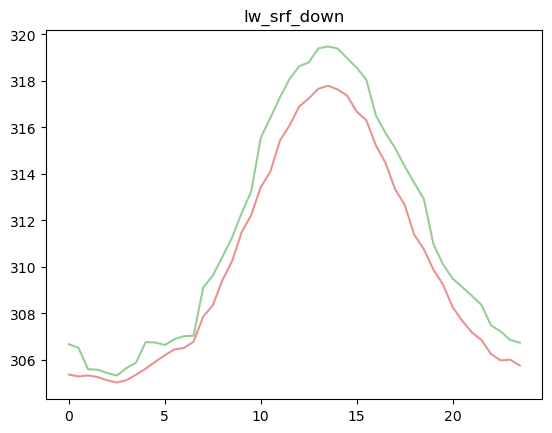

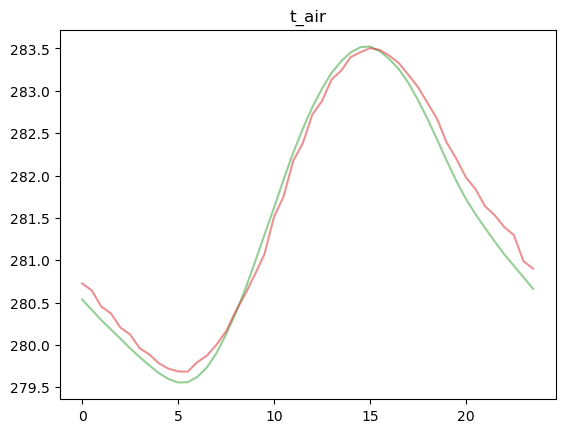

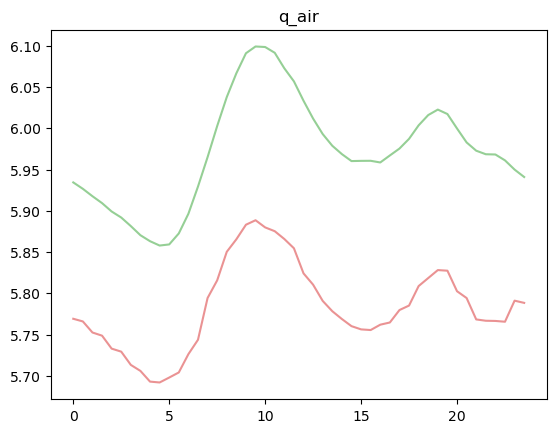

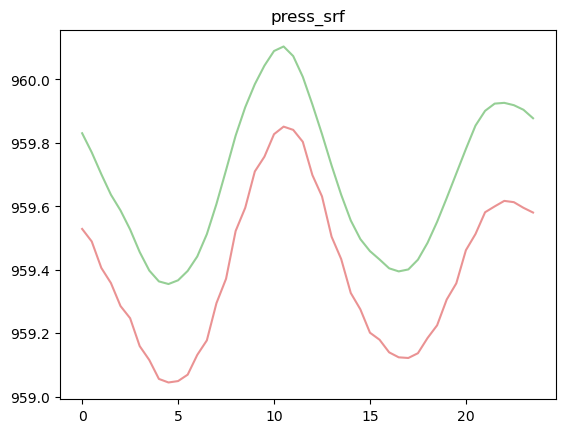

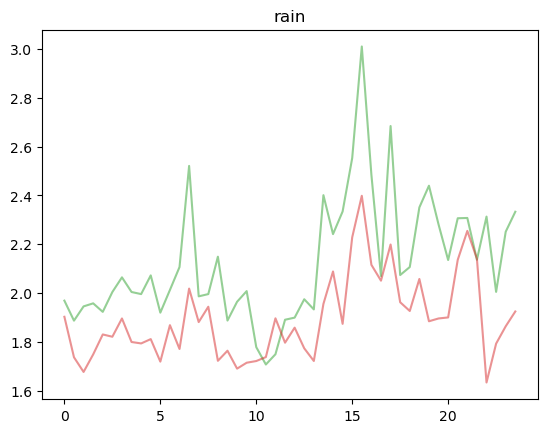

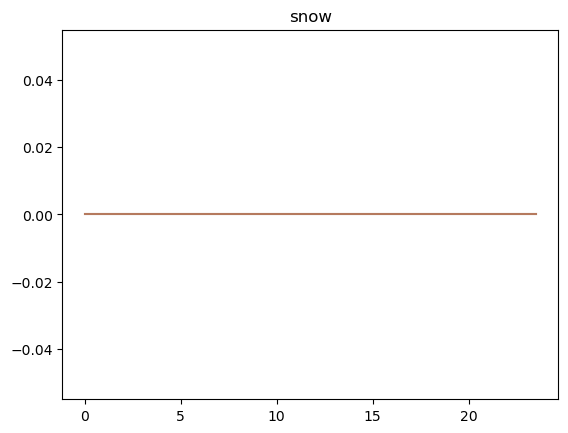

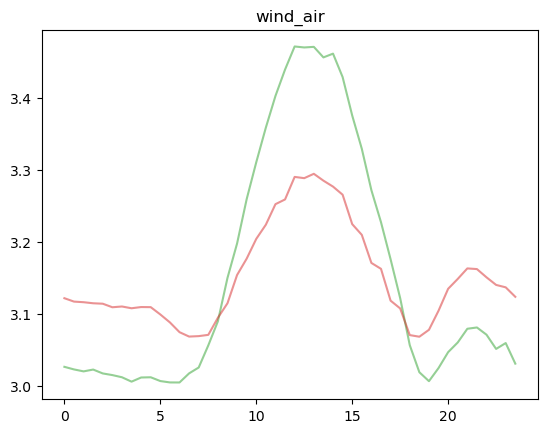

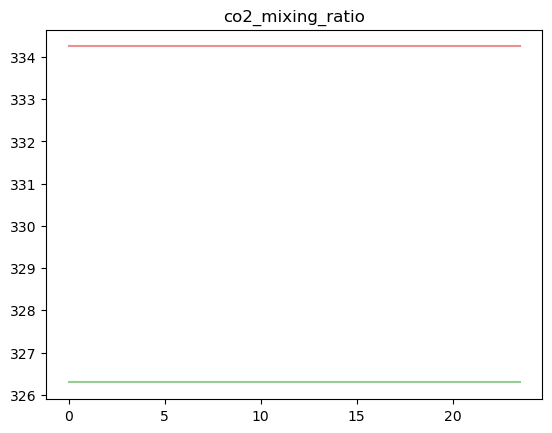

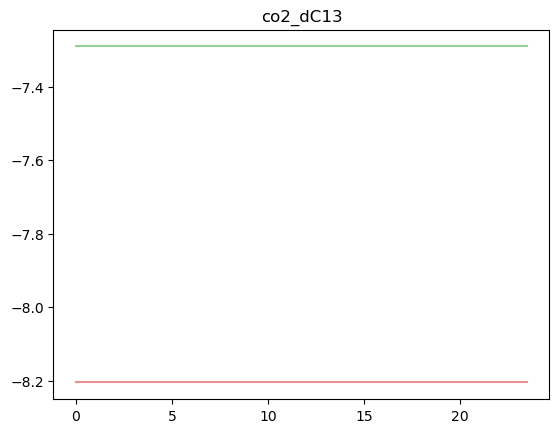

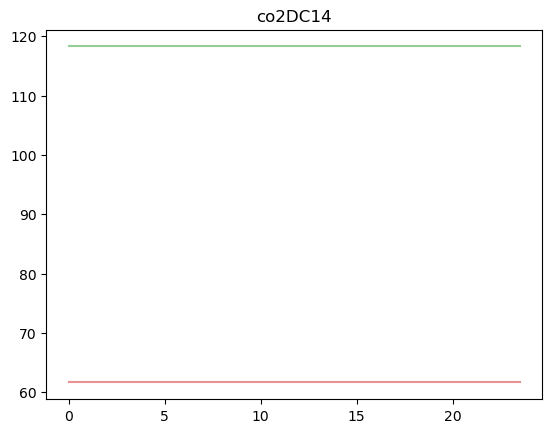

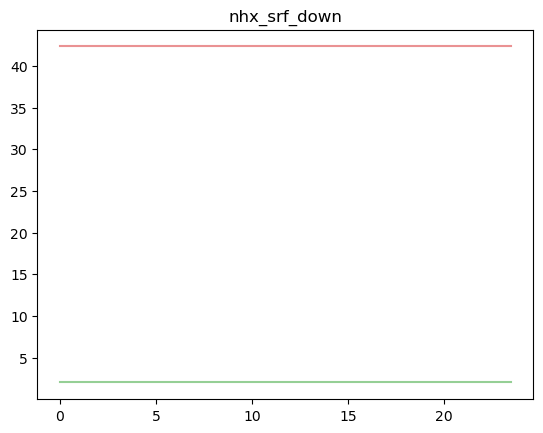

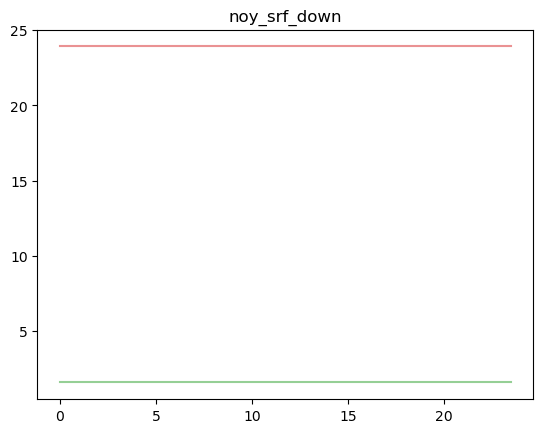

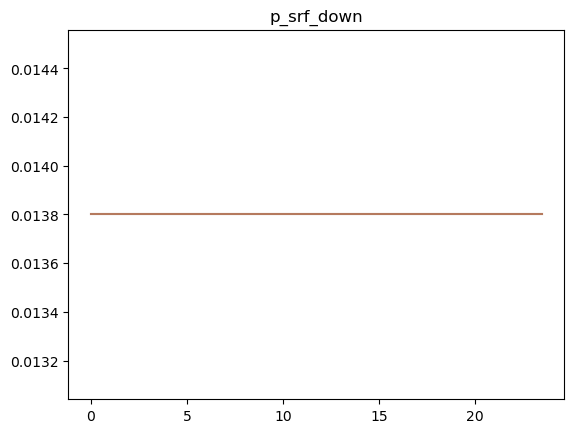

In [6]:
# df_f22 =df_f22[df_f22['year'] >= 1980]
# df_f3 =df_f3[df_f3['year'] >= 1980]
# df_f24 =df_f24[df_f24['year'] >= 1980]

for subsect in ['year', 'doy', 'hour']:
    for col in cols_all:
        
        df_f3_year_avg = df_f3.groupby(subsect).mean()
        df_22_year_avg = df_f22.groupby(subsect).mean()
        df_24_year_avg = df_f24.groupby(subsect).mean()
        
        plt.figure()
        plt.plot(df_f3_year_avg[col], alpha =0.5, c= 'tab:green');
        #plt.plot(df_22_year_avg[col], alpha = 0.5, c=  'tab:blue');
        plt.plot(df_24_year_avg[col], alpha = 0.5, c = 'tab:red');

        plt.title(col);
        plt.savefig(f"{col}_{subsect}.png");

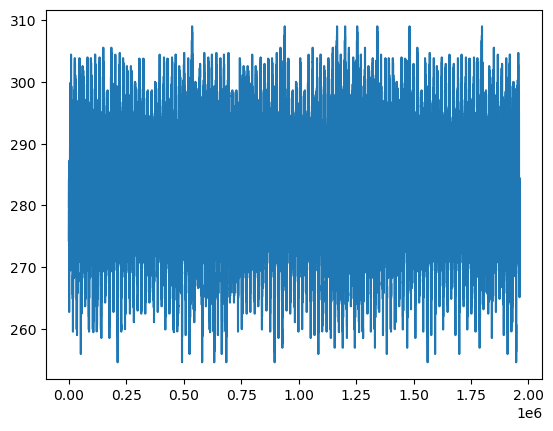

TIMESTAMP_START        TIMESTAMP_END      PA_44m    WS_44m  \
0      2024-01-01 00:00:00  2024-01-01 00:30:00  948.077122  6.318000   
1      2024-01-01 00:30:00  2024-01-01 01:00:00  948.093342  5.236800   
2      2024-01-01 01:00:00  2024-01-01 01:30:00  947.898694  5.313600   
3      2024-01-01 01:30:00  2024-01-01 02:00:00  947.768929  5.055200   
4      2024-01-01 02:00:00  2024-01-01 02:30:00  947.996018  5.040800   
...                    ...                  ...         ...       ...   
17563  2024-12-31 21:30:00  2024-12-31 22:00:00  964.597567  6.996000   
17564  2024-12-31 22:00:00  2024-12-31 22:30:00  964.535133  7.463667   
17565  2024-12-31 22:30:00  2024-12-31 23:00:00  963.909067  9.580000   
17566  2024-12-31 23:00:00  2024-12-31 23:30:00  963.762000  8.496667   
17567  2024-12-31 23:30:00  2025-01-01 00:00:00  963.764600  7.305000   

           WD_44m  SW_IN_44m  SW_OUT_44m   LW_IN_44m  LW_OUT_44m  \
0      225.200281   0.000000      0.0000  321.900000  338.850000   
1      232.480296   0.000000      0.0000  324.800000  338.966667   
2      239.344146   0.000000      0.0000  325.833333  339.166667   
3      234.559611   0.000000      0.0000  325.766667  339.133333   
4      233.120476   0.000000      0.0000  326.500000  339.100000   
...           ...        ...         ...         ...         ...   
17563  247.699629   0.664417      0.0136  301.566667  301.700000   
17564  242.328874   0.000000      0.0294  302.300000  302.366667   
17565  243.498834   0.000000      0.0045  302.433333  302.566667   
17566  246.167003   0.000000      0.0000  302.866667  303.066667   
17567  250.500000   0.654000      0.0000  303.666667  305.066667   

       SW_DIF_IN_44m  ...  TS_5cm_2  TS_15cm_2  TS_30cm_2  TS_50cm_2  \
0           0.000000  ...  4.959000   5.250500   5.495000   5.863000   
1           0.000000  ...  4.958333   5.246000   5.493667   5.862000   
2           0.000000  ...  4.958667   5.241000   5.492000   5.861000   
3           0.000000  ...  4.961000   5.237000   5.490333   5.860333   
4           0.000000  ...  4.963000   5.234000   5.487667   5.859667   
...              ...  ...       ...        ...        ...        ...   
17563       2.344444  ...  1.663000   2.372000   3.396000   4.665000   
17564       5.131534  ...  1.657000   2.367333   3.392000   4.661333   
17565       5.135704  ...  1.652333   2.362667   3.389000   4.658000   
17566       5.128892  ...  1.647333   2.357667   3.386000   4.654667   
17567       2.343816  ...  1.642333   2.353667   3.382000   4.651000   

       SWC_8cm_1  SWC_16cm_1  SWC_32cm_1  SWC_8cm_2  SWC_8cm_3  SWC_8cm_4  
0            NaN         NaN         NaN        NaN        NaN        NaN  
1            NaN         NaN         NaN        NaN        NaN        NaN  
2            NaN         NaN         NaN        NaN        NaN        NaN  
3            NaN         NaN         NaN        NaN        NaN        NaN  
4            NaN         NaN         NaN        NaN        NaN        NaN  
...          ...         ...         ...        ...        ...        ...  
17563  42.420028       34.40   45.066667  41.570000  38.893333  38.780000  
17564  42.420028       34.39   45.060000  41.570000  38.890000  38.770000  
17565  42.420028       34.39   45.060000  41.570000  38.890000  38.766667  
17566  42.416604       34.39   45.060000  41.566667  38.880000  38.760000  
17567  42.420028       34.39   45.060000  41.570000  38.880000  38.760000  

[17568 rows x 37 columns]

In [43]:
cols

['swvis_srf_down',
 'lw_srf_down',
 't_air',
 'q_air',
 'press_srf',
 'rain',
 'snow',
 'wind_air']

In [38]:

df_f2324

PA_44m    WS_44m      WD_44m  SW_IN_44m  SW_OUT_44m   LW_IN_44m  \
0      956.868950  5.810500  237.600000   0.000000    0.000000  288.750000   
1      956.844467  6.813667  244.269569   0.018481    0.018481  287.733333   
2      957.021233  5.376667  237.666442   0.166333    0.166333  286.400000   
3      957.086333  6.370333  243.499061   0.332667    0.332667  287.400000   
4      957.247833  5.311000  231.165277   0.499000    0.499000  286.700000   
...           ...       ...         ...        ...         ...         ...   
17563  964.597567  6.996000  247.699629   0.664417    0.013600  301.566667   
17564  964.535133  7.463667  242.328874   0.000000    0.029400  302.300000   
17565  963.909067  9.580000  243.498834   0.000000    0.004500  302.433333   
17566  963.762000  8.496667  246.167003   0.000000    0.000000  302.866667   
17567  963.764600  7.305000  250.500000   0.654000    0.000000  303.666667   

       LW_OUT_44m  SW_DIF_IN_44m  PPFD_IN_44m  PPFD_OUT_44m  ...  year  hour  \
0      376.250000       4.257669     0.849000      0.000000  ...  2023   0.0   
1      375.266667       2.821303     0.141500      0.000000  ...  2023   0.5   
2      375.266667       4.347958     1.414667      0.000000  ...  2023   1.0   
3      374.266667       4.423292     3.395000      0.550000  ...  2023   1.5   
4      374.966667       3.166381     1.414667      0.000000  ...  2023   2.0   
...           ...            ...          ...           ...  ...   ...   ...   
17563  301.700000       2.344444     0.112333      0.034333  ...  2024  21.5   
17564  302.366667       5.131534     0.093000      0.036000  ...  2024  22.0   
17565  302.566667       5.135704     0.113000      0.052000  ...  2024  22.5   
17566  303.066667       5.128892     0.080333      0.064333  ...  2024  23.0   
17567  305.066667       2.343816     0.097000      0.047000  ...  2024  23.5   

       doy       t_air  swvis_srf_down  lw_srf_down   press_srf  rain  \
0        1  287.110000        0.000000   288.750000  956.868950   0.0   
1        1  287.043333        0.018481   287.733333  956.844467   0.0   
2        1  286.993333        0.166333   286.400000  957.021233   0.0   
3        1  286.770000        0.332667   287.400000  957.086333   0.0   
4        1  286.710000        0.499000   286.700000  957.247833   0.0   
...    ...         ...             ...          ...         ...   ...   
17563  366  270.156667        0.664417   301.566667  964.597567   0.0   
17564  366  270.283333        0.000000   302.300000  964.535133   0.0   
17565  366  270.306667        0.000000   302.433333  963.909067   0.0   
17566  366  270.486667        0.000000   302.866667  963.762000   0.0   
17567  366  270.906667        0.654000   303.666667  963.764600   0.0   

       wind_air     q_air  
0      5.810500  5.227555  
1      6.813667  5.211991  
2      5.376667  5.332155  
3      6.370333  5.251337  
4      5.311000  5.321349  
...         ...       ...  
17563  6.996000  3.105342  
17564  7.463667  3.121438  
17565  9.580000  3.134144  
17566  8.496667  3.153596  
17567  7.305000  3.255588  

[34992 rows x 46 columns]

In [ ]:
path_f22 = '/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/Meteo_Hainich_dT30min_2000-2024.csv'
df_f22f = pd.read_csv(path_f22, sep=',', index_col=None, skiprows=[1], usecols=range(0,30))
df_f22f['date'] = pd.to_datetime(df_f22f['datetime'])
df_f22f = df_f22f[df_f22f['date'].dt.year == 2022]

In [25]:
df_f22f

datetime  SWDR_4400  TA_44m   rH_4400  WS_4400  WD_4400  \
385727  2022-01-01T00:00:00Z      0.823   9.840   99.6333    4.266      NaN   
385728  2022-01-01T00:30:00Z      0.901   9.850  100.0000    4.317      NaN   
385729  2022-01-01T01:00:00Z      0.828   9.760  100.0000    4.368      NaN   
385730  2022-01-01T01:30:00Z      0.444   9.777  100.0000    4.375      NaN   
385731  2022-01-01T02:00:00Z      0.530   9.920   99.2333    4.382      NaN   
...                      ...        ...     ...       ...      ...      ...   
403242  2022-12-31T21:30:00Z      0.086  13.567       NaN    6.512  215.806   
403243  2022-12-31T22:00:00Z      0.054  13.690       NaN    6.405  217.403   
403244  2022-12-31T22:30:00Z      0.040  13.880       NaN    5.918  217.566   
403245  2022-12-31T23:00:00Z      0.058  13.923       NaN    5.727  223.022   
403246  2022-12-31T23:30:00Z      0.123  13.910       NaN    5.714  223.645   

        Pa_4400  P_4400   LE_4400   H_4400  ...  Ts_50   SM_08   SM_16  \
385727   96.500     0.0  -7.25919  47.5943  ...  4.757  40.926  35.083   
385728   96.533     0.1  -9.99458  47.5943  ...  4.766  40.922  35.077   
385729   96.600     0.0 -11.50670  61.4847  ...  4.775  40.916  35.070   
385730   96.600     0.1 -13.27570  61.4847  ...  4.783  40.907  35.060   
385731   96.600     0.0 -14.63770 -16.5966  ...  4.793  40.903  35.057   
...         ...     ...       ...      ...  ...    ...     ...     ...   
403242   95.570     0.0 -10.65060 -35.3540  ...  5.597  36.270  33.420   
403243   95.583     0.0 -58.34140 -41.4676  ...  5.601  36.259  33.420   
403244   95.595     0.0 -58.34140 -79.5413  ...  5.607  36.278  33.413   
403245   95.619     0.0 -11.27580 -53.3268  ...  5.612  36.277  33.410   
403246   95.646     0.0 -18.81960 -66.5262  ...  5.614  36.280  33.410   

         SM_32  Ta_200  VPD_4400  LWDR_4400  ET_4400    Pcs  \
385727  45.080     NaN  0.004454        NaN      NaN  0.468   
385728  45.080     NaN  0.000000        NaN      NaN  0.468   
385729  45.080     NaN  0.000000        NaN      NaN  0.562   
385730  45.070     NaN  0.000000        NaN      NaN  0.562   
385731  45.070     NaN  0.009363        NaN      NaN  0.560   
...        ...     ...       ...        ...      ...    ...   
403242  44.977     NaN       NaN        NaN      NaN  0.400   
403243  44.980     NaN       NaN        NaN      NaN  0.200   
403244  44.980     NaN       NaN        NaN      NaN  0.200   
403245  44.980     NaN       NaN        NaN      NaN  0.200   
403246  44.980     NaN       NaN        NaN      NaN  0.200   

                            date  
385727 2022-01-01 00:00:00+00:00  
385728 2022-01-01 00:30:00+00:00  
385729 2022-01-01 01:00:00+00:00  
385730 2022-01-01 01:30:00+00:00  
385731 2022-01-01 02:00:00+00:00  
...                          ...  
403242 2022-12-31 21:30:00+00:00  
403243 2022-12-31 22:00:00+00:00  
403244 2022-12-31 22:30:00+00:00  
403245 2022-12-31 23:00:00+00:00  
403246 2022-12-31 23:30:00+00:00  

[17520 rows x 31 columns]

In [ ]:

df_f22f.rename(columns={'Ta_4400':'TA_44m'}, inplace = True)
df_f22f.rename(columns={'Ta_4400':'SW_IN_44m'}, inplace = True)

/tmp/ipykernel_1955493/907740234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_f22f.rename(columns={'Ta_4400':'TA_44m'}, inplace = True)


In [22]:

path_f23 = '/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/DE-Hai_Meteo_tower_30min_20230101_20240101_gapfilled.csv'
path_f24 = '/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/DE-Hai_Meteo_tower_30min_20240101_20250101_gapfilled.csv'
df_f23 = pd.read_csv(path_f23, sep=',', index_col=None, skiprows=[1])
df_f23['date'] = pd.to_datetime(df_f23['TIMESTAMP_START'])
df_f24 = pd.read_csv(path_f24, sep=',', index_col=None, skiprows=[1])
df_f24['date'] = pd.to_datetime(df_f24['TIMESTAMP_START'])
df_f24 = df_f24.drop(df_f24[(df_f24['date'].dt.day == 29)&(df_f24['date'].dt.month == 2)].index)

df_f2324 = pd.concat([df_f23, df_f24], axis = 0)

df_f2324['year'] = df_f2324['date'].dt.year
df_f2324['hour'] = df_f2324['date'].dt.minute/ 60.0 + df_f2324['date'].dt.hour
df_f2324['doy'] = df_f2324['date'].dt.day_of_year
df_f2324['t_air'] = df_f2324['TA_44m']   + 273.15
df_f2324['swvis_srf_down']  = df_f2324['SW_IN_44m']
df_f2324['lw_srf_down'] = df_f2324['LW_IN_44m']
df_f2324['press_srf'] = df_f2324['PA_44m']
df_f2324['rain'] = df_f2324['P_1m'] * 48.0
df_f2324['wind_air'] = df_f2324['WS_44m']

pres = df_f2324['PA_44m']* 100.0 # in Pascal
tC = df_f2324['TA_44m']
vpd =   df_f2324['VPD_44m'] * 100.0 # in Pascal 
svp = 610.78 * np.exp((17.2694 * tC) / (tC + 237.3)) # in Pascal
avp = svp - vpd
df_f2324['q_air'] = 0.622 * avp/ (pres  - 0.378 * avp)
df_f2324['q_air'] *= 1000.0 # Convert to g per kg

df_f2324.drop(['TIMESTAMP_START', 'TIMESTAMP_END'] , axis = 1, inplace=True)

In [43]:
df_f2324

PA_44m    WS_44m      WD_44m  SW_IN_44m  SW_OUT_44m   LW_IN_44m  \
0      956.868950  5.810500  237.600000   0.000000    0.000000  288.750000   
1      956.844467  6.813667  244.269569   0.018481    0.018481  287.733333   
2      957.021233  5.376667  237.666442   0.166333    0.166333  286.400000   
3      957.086333  6.370333  243.499061   0.332667    0.332667  287.400000   
4      957.247833  5.311000  231.165277   0.499000    0.499000  286.700000   
...           ...       ...         ...        ...         ...         ...   
17563  964.597567  6.996000  247.699629   0.664417    0.013600  301.566667   
17564  964.535133  7.463667  242.328874   0.000000    0.029400  302.300000   
17565  963.909067  9.580000  243.498834   0.000000    0.004500  302.433333   
17566  963.762000  8.496667  246.167003   0.000000    0.000000  302.866667   
17567  963.764600  7.305000  250.500000   0.654000    0.000000  303.666667   

       LW_OUT_44m  SW_DIF_IN_44m  PPFD_IN_44m  PPFD_OUT_44m  ...  year  hour  \
0      376.250000       4.257669     0.849000      0.000000  ...  2023   0.0   
1      375.266667       2.821303     0.141500      0.000000  ...  2023   0.5   
2      375.266667       4.347958     1.414667      0.000000  ...  2023   1.0   
3      374.266667       4.423292     3.395000      0.550000  ...  2023   1.5   
4      374.966667       3.166381     1.414667      0.000000  ...  2023   2.0   
...           ...            ...          ...           ...  ...   ...   ...   
17563  301.700000       2.344444     0.112333      0.034333  ...  2024  21.5   
17564  302.366667       5.131534     0.093000      0.036000  ...  2024  22.0   
17565  302.566667       5.135704     0.113000      0.052000  ...  2024  22.5   
17566  303.066667       5.128892     0.080333      0.064333  ...  2024  23.0   
17567  305.066667       2.343816     0.097000      0.047000  ...  2024  23.5   

       doy       t_air  swvis_srf_down  lw_srf_down   press_srf  rain  \
0        1  287.110000        0.000000   288.750000  956.868950   0.0   
1        1  287.043333        0.018481   287.733333  956.844467   0.0   
2        1  286.993333        0.166333   286.400000  957.021233   0.0   
3        1  286.770000        0.332667   287.400000  957.086333   0.0   
4        1  286.710000        0.499000   286.700000  957.247833   0.0   
...    ...         ...             ...          ...         ...   ...   
17563  366  270.156667        0.664417   301.566667  964.597567   0.0   
17564  366  270.283333        0.000000   302.300000  964.535133   0.0   
17565  366  270.306667        0.000000   302.433333  963.909067   0.0   
17566  366  270.486667        0.000000   302.866667  963.762000   0.0   
17567  366  270.906667        0.654000   303.666667  963.764600   0.0   

       wind_air     q_air  
0      5.810500  5.227555  
1      6.813667  5.211991  
2      5.376667  5.332155  
3      6.370333  5.251337  
4      5.311000  5.321349  
...         ...       ...  
17563  6.996000  3.105342  
17564  7.463667  3.121438  
17565  9.580000  3.134144  
17566  8.496667  3.153596  
17567  7.305000  3.255588  

[35040 rows x 46 columns]

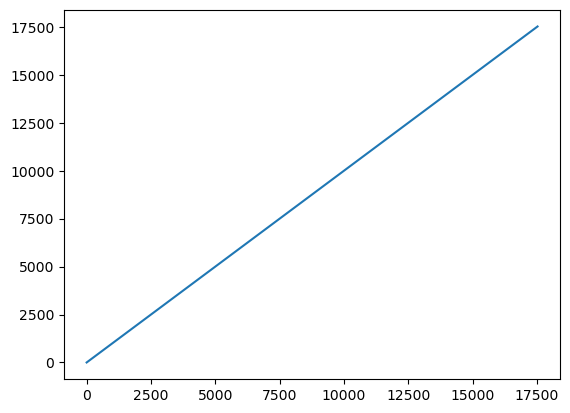

In [42]:
plt.plot(df_f2324[df_f2324['year'] == 2023].index)

In [24]:
avp.describe()

count    35088.000000
mean      1002.755062
std        412.506725
min        215.891043
25%        685.944630
50%        937.042585
75%       1285.344843
max       2397.795989
dtype: float64

In [107]:
df_f2324['SW_IN_44m']

0        0.000000
1        0.018481
2        0.166333
3        0.332667
4        0.499000
           ...   
17563    0.664417
17564    0.000000
17565    0.000000
17566    0.000000
17567    0.654000
Name: SW_IN_44m, Length: 35088, dtype: float64

In [108]:
df_f2324['SW_IN_44m'].describe()

count    35088.000000
mean       130.511473
std        215.761213
min          0.000000
25%          0.356500
50%          5.460683
75%        172.608333
max       1035.000000
Name: SW_IN_44m, dtype: float64

In [84]:
df_f2324

PA_44m    WS_44m      WD_44m  SW_IN_44m  SW_OUT_44m   LW_IN_44m  \
0      956.868950  5.810500  237.600000   0.000000    0.000000  288.750000   
1      956.844467  6.813667  244.269569   0.018481    0.018481  287.733333   
2      957.021233  5.376667  237.666442   0.166333    0.166333  286.400000   
3      957.086333  6.370333  243.499061   0.332667    0.332667  287.400000   
4      957.247833  5.311000  231.165277   0.499000    0.499000  286.700000   
...           ...       ...         ...        ...         ...         ...   
17563  964.597567  6.996000  247.699629   0.664417    0.013600  301.566667   
17564  964.535133  7.463667  242.328874   0.000000    0.029400  302.300000   
17565  963.909067  9.580000  243.498834   0.000000    0.004500  302.433333   
17566  963.762000  8.496667  246.167003   0.000000    0.000000  302.866667   
17567  963.764600  7.305000  250.500000   0.654000    0.000000  303.666667   

       LW_OUT_44m  SW_DIF_IN_44m  PPFD_IN_44m  PPFD_OUT_44m  ...  SWC_16cm_1  \
0      376.250000       4.257669     0.849000      0.000000  ...       33.41   
1      375.266667       2.821303     0.141500      0.000000  ...       33.41   
2      375.266667       4.347958     1.414667      0.000000  ...       33.41   
3      374.266667       4.423292     3.395000      0.550000  ...       33.40   
4      374.966667       3.166381     1.414667      0.000000  ...       33.40   
...           ...            ...          ...           ...  ...         ...   
17563  301.700000       2.344444     0.112333      0.034333  ...       34.40   
17564  302.366667       5.131534     0.093000      0.036000  ...       34.39   
17565  302.566667       5.135704     0.113000      0.052000  ...       34.39   
17566  303.066667       5.128892     0.080333      0.064333  ...       34.39   
17567  305.066667       2.343816     0.097000      0.047000  ...       34.39   

       SWC_32cm_1  SWC_8cm_2  SWC_8cm_3  SWC_8cm_4                date  year  \
0       44.980000  39.850000  34.710000  33.460000 2023-01-01 00:00:00  2023   
1       44.986667  39.850000  34.700000  33.456667 2023-01-01 00:30:00  2023   
2       44.990000  39.830000  34.690000  33.450000 2023-01-01 01:00:00  2023   
3       44.990000  39.830000  34.686667  33.446667 2023-01-01 01:30:00  2023   
4       44.990000  39.820000  34.680000  33.440000 2023-01-01 02:00:00  2023   
...           ...        ...        ...        ...                 ...   ...   
17563   45.066667  41.570000  38.893333  38.780000 2024-12-31 21:30:00  2024   
17564   45.060000  41.570000  38.890000  38.770000 2024-12-31 22:00:00  2024   
17565   45.060000  41.570000  38.890000  38.766667 2024-12-31 22:30:00  2024   
17566   45.060000  41.566667  38.880000  38.760000 2024-12-31 23:00:00  2024   
17567   45.060000  41.570000  38.880000  38.760000 2024-12-31 23:30:00  2024   

       hour  doy      t_air  
0       0.0    1  13.960000  
1       0.5    1  13.893333  
2       1.0    1  13.843333  
3       1.5    1  13.620000  
4       2.0    1  13.560000  
...     ...  ...        ...  
17563  21.5  366  -2.993333  
17564  22.0  366  -2.866667  
17565  22.5  366  -2.843333  
17566  23.0  366  -2.663333  
17567  23.5  366  -2.243333  

[35088 rows x 40 columns]

In [1]:
df_22_year_avg

NameError: name 'df_22_year_avg' is not defined

/tmp/ipykernel_2550538/4280142669.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


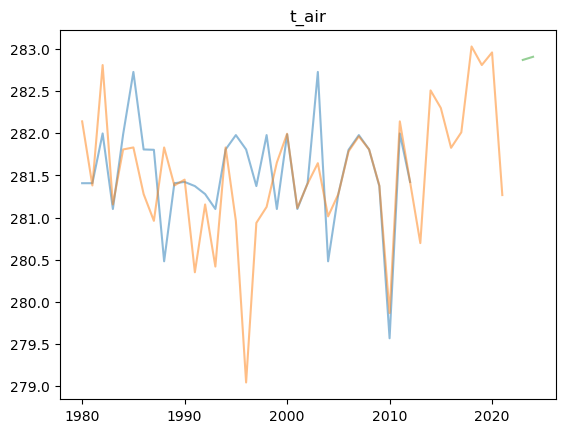

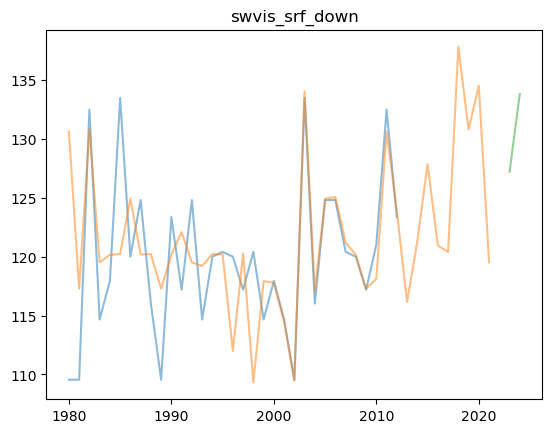

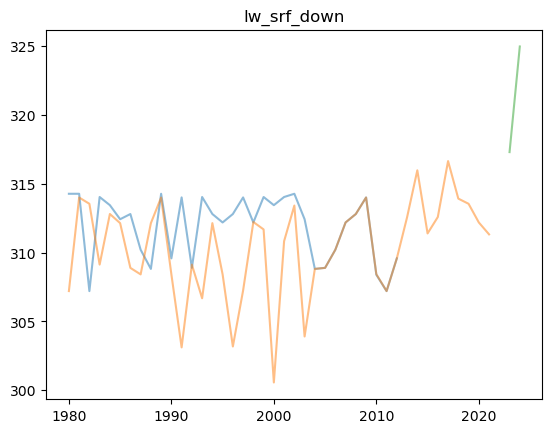

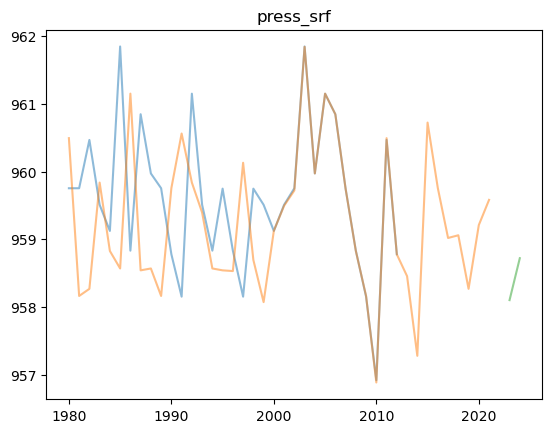

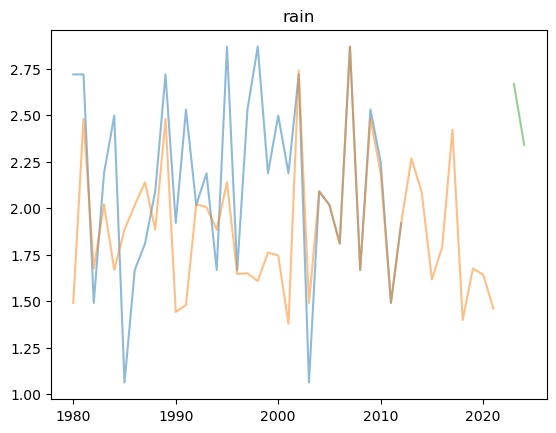

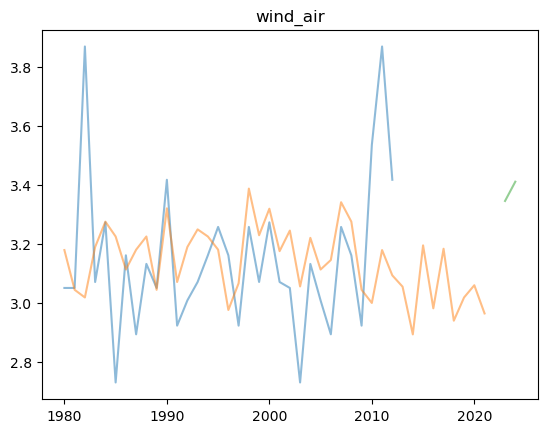

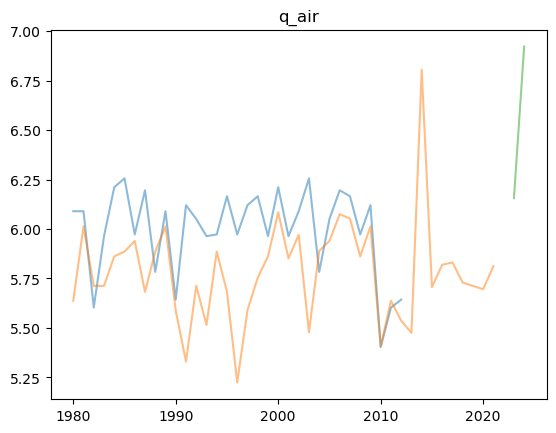

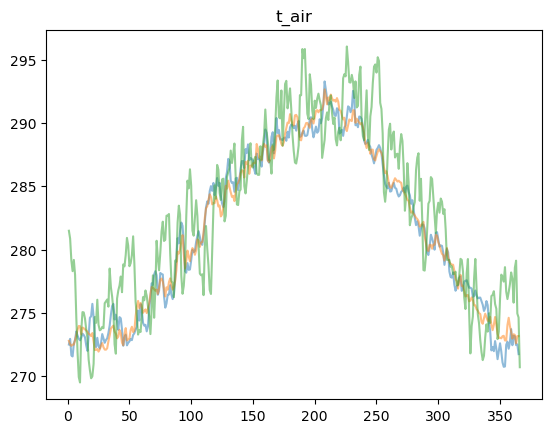

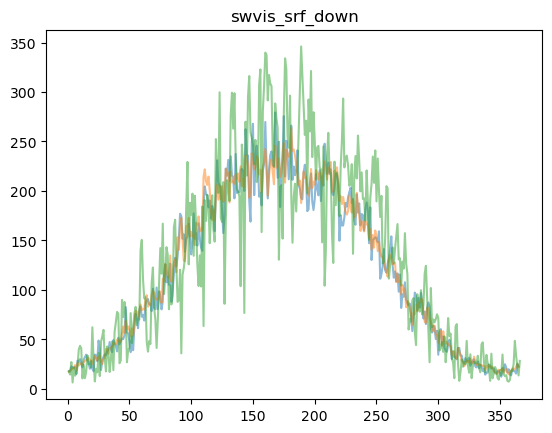

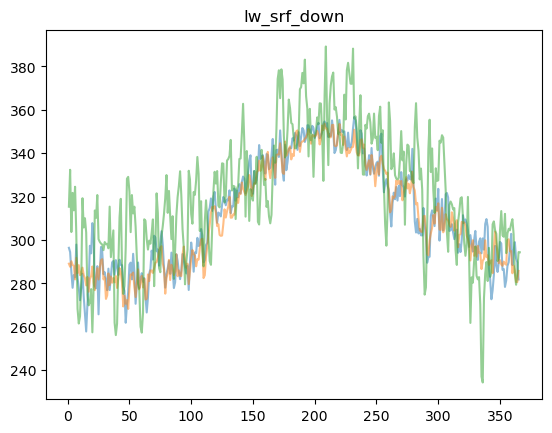

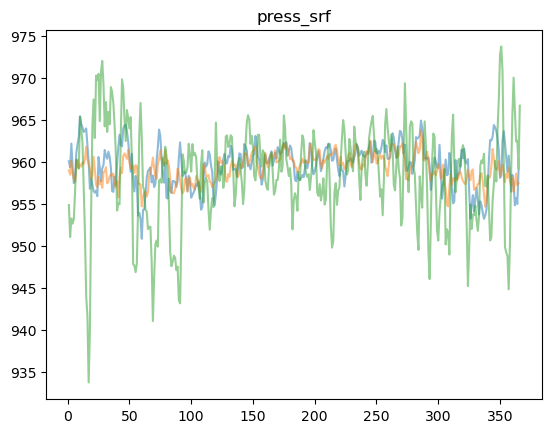

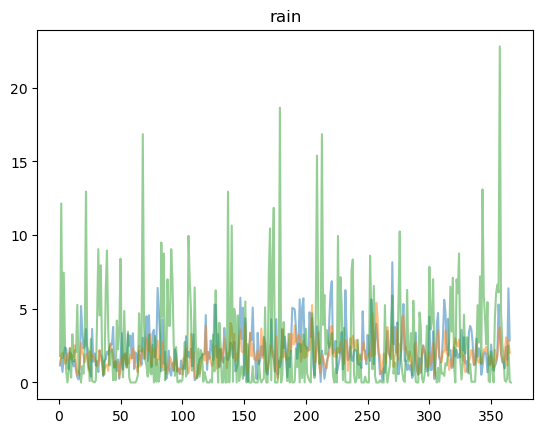

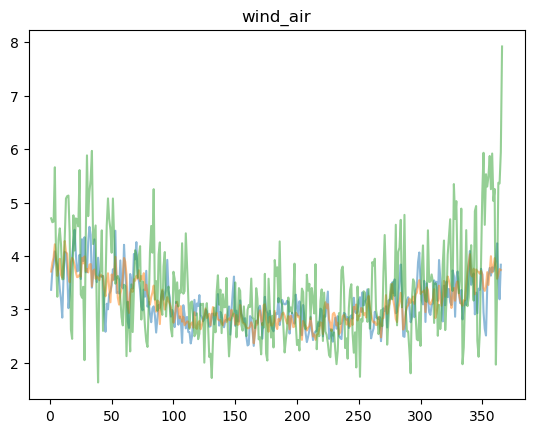

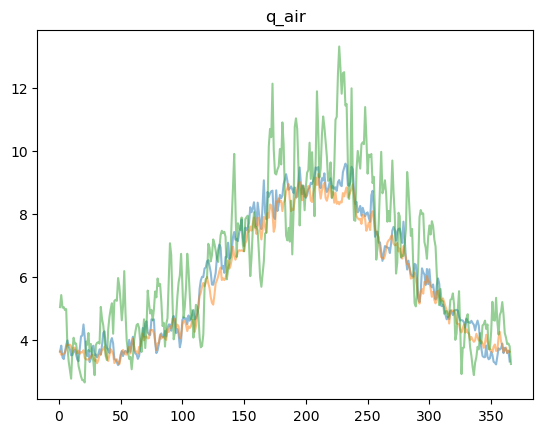

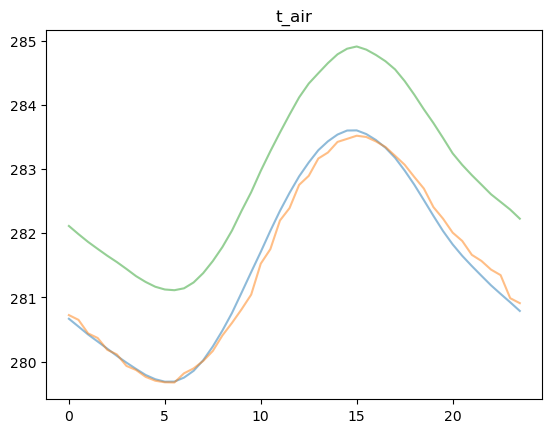

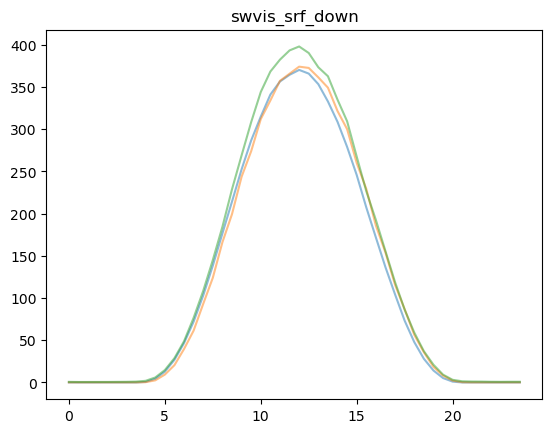

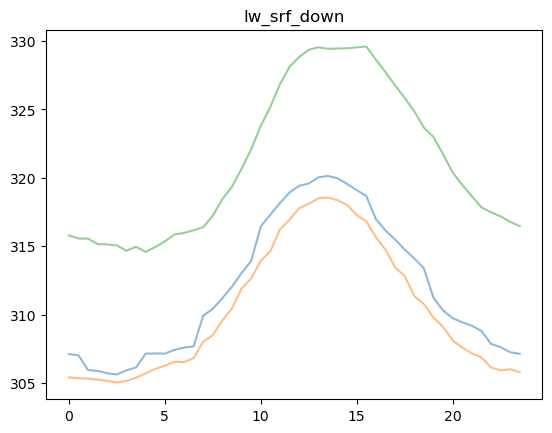

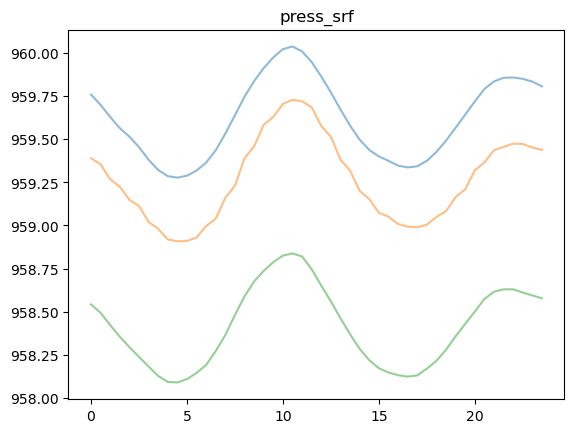

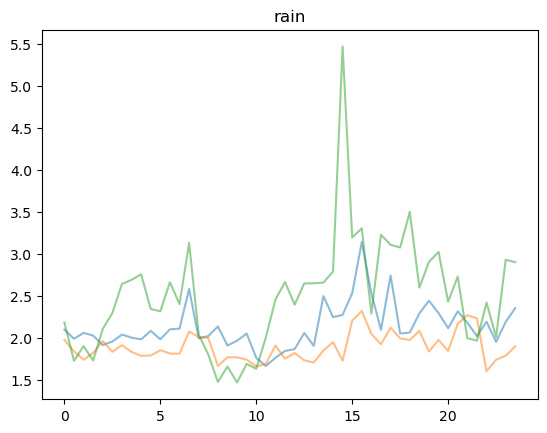

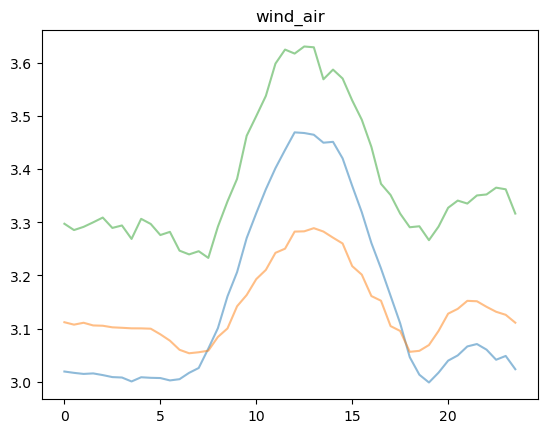

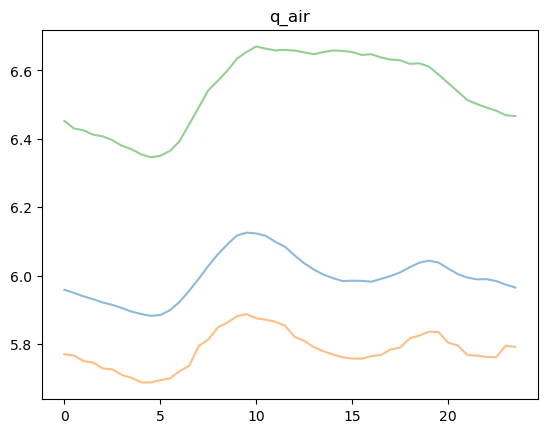

In [47]:
df_f22 =df_f22[df_f22['year'] >= 1980]
df_f3 =df_f3[df_f3['year'] >= 1980]

for subsect in ['year', 'doy', 'hour']:
    for col in ['t_air', 'swvis_srf_down', 'lw_srf_down', 'press_srf', 'rain', 'wind_air', 'q_air']:
        

        df_f3_year_avg = df_f3.groupby(subsect).mean()

        df_22_year_avg = df_f22.groupby(subsect).mean()
        df_f2324_avg = df_f2324.groupby(subsect).mean()
        
        plt.figure()
        plt.plot(df_f3_year_avg[col], alpha =0.5);
        plt.plot(df_22_year_avg[col], alpha = 0.5);
        plt.plot(df_f2324_avg[col], alpha = 0.5);

        plt.title(col);
        plt.savefig(f"{col}_{subsect}.png");

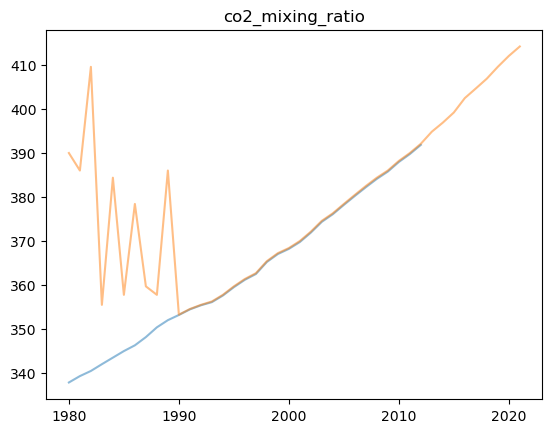

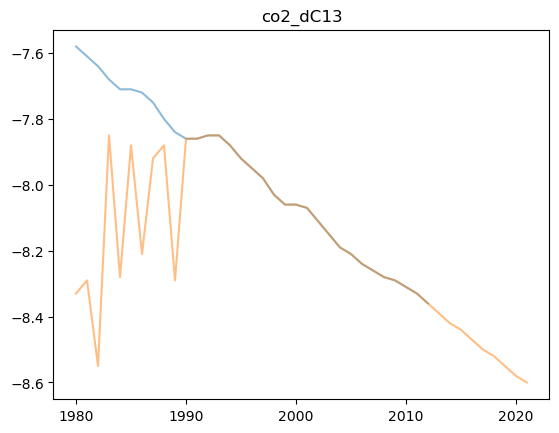

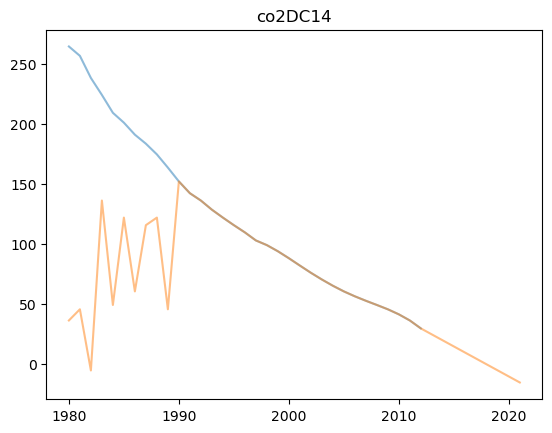

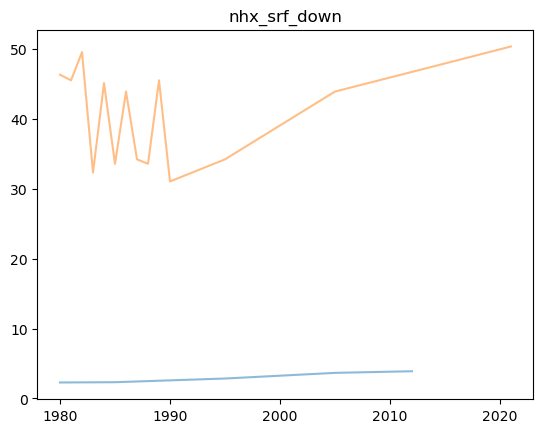

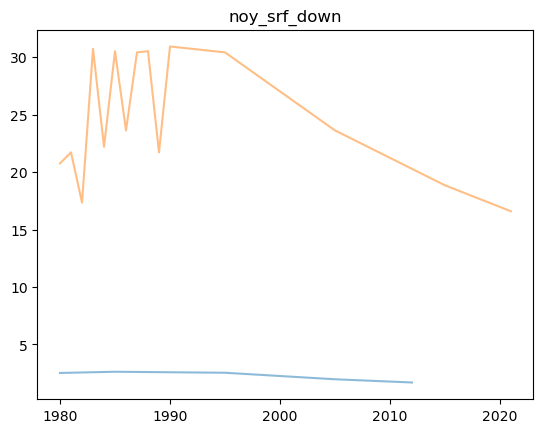

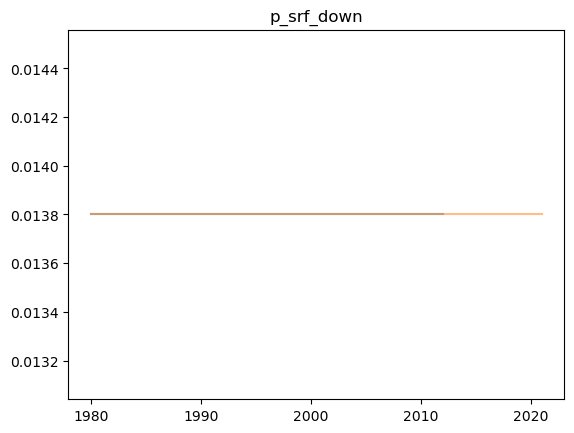

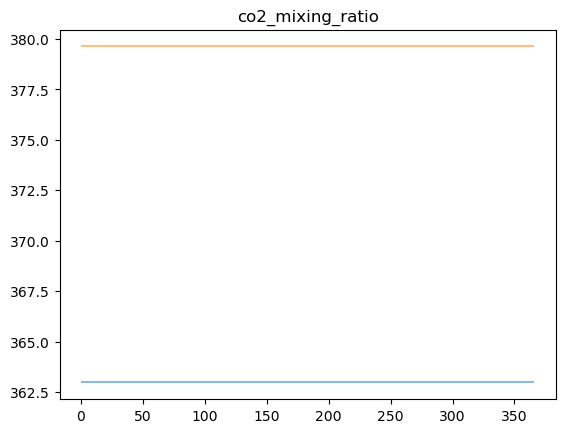

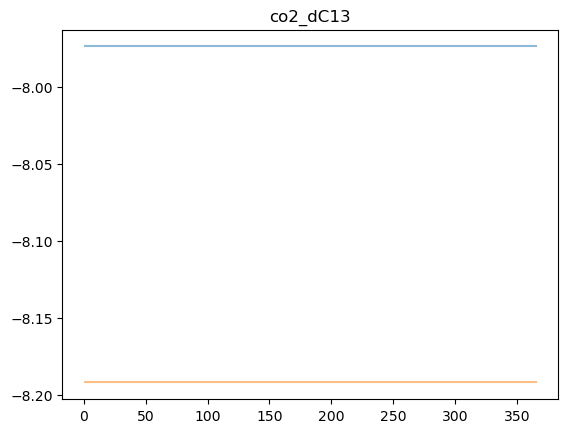

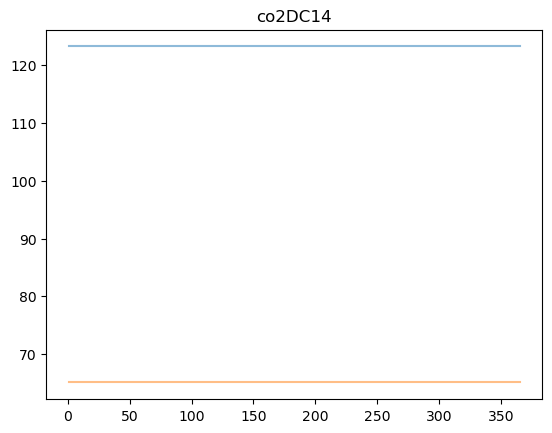

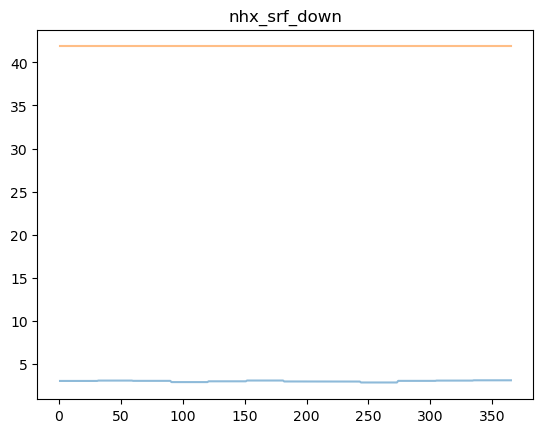

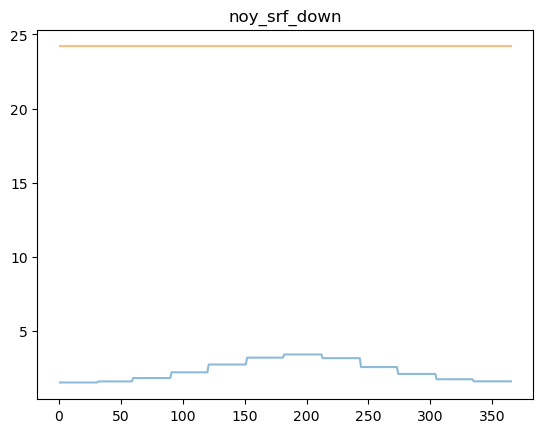

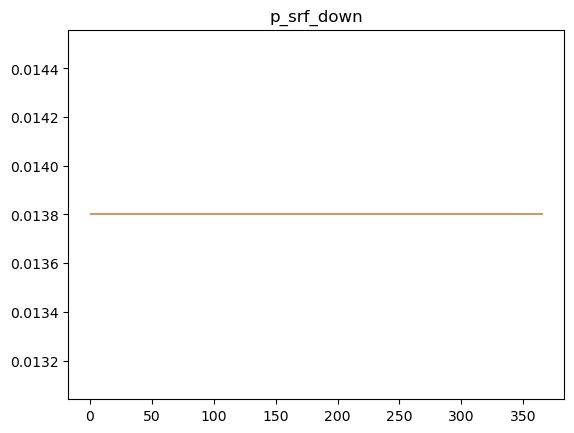

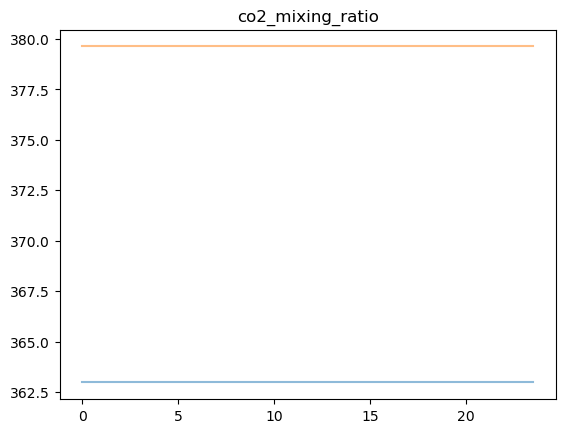

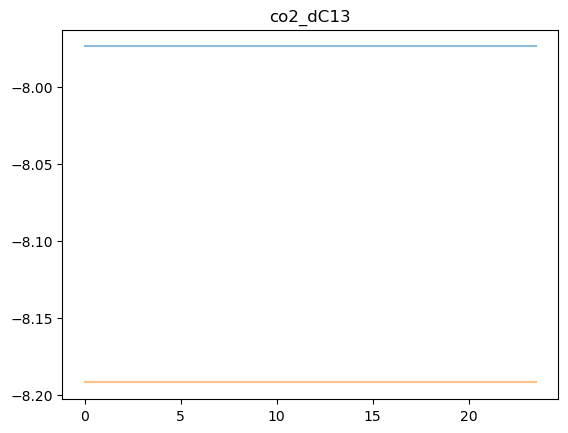

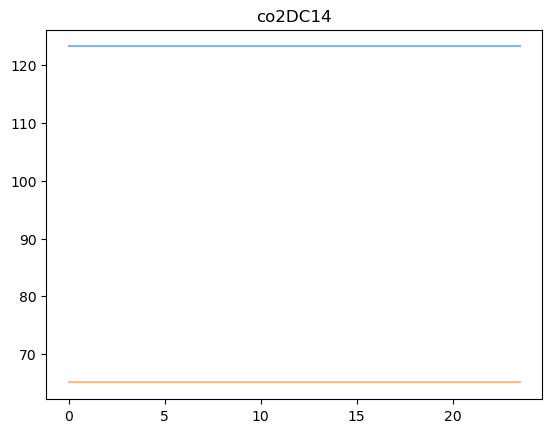

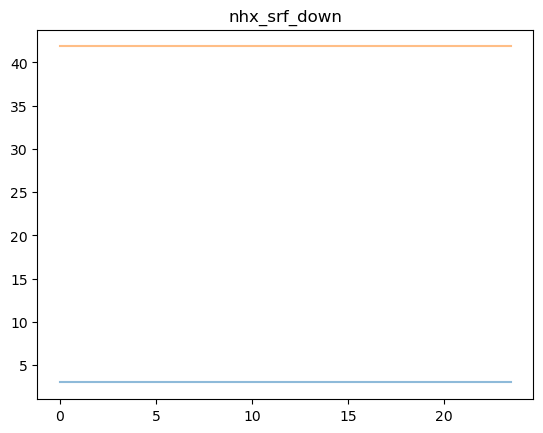

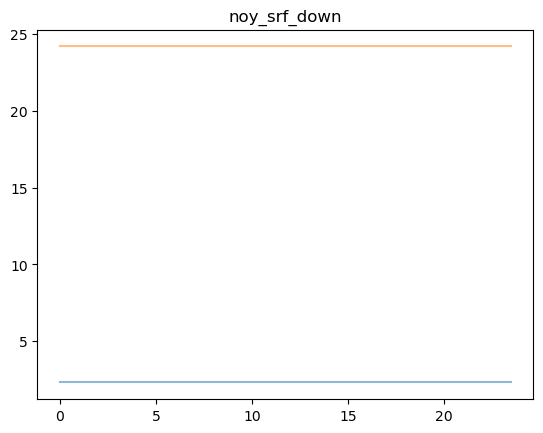

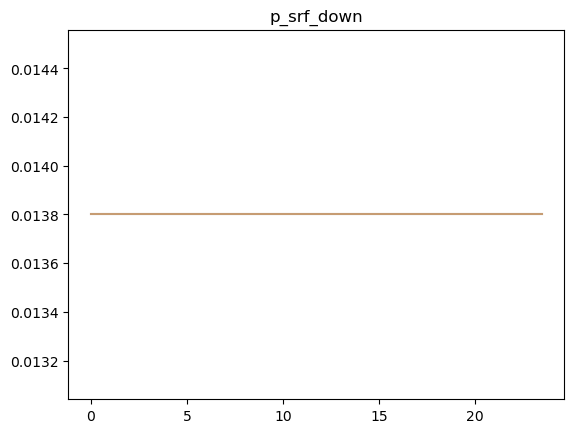

In [52]:
df_f22 =df_f22
df_f3 =df_f3

cols2 =['co2_mixing_ratio',
       'co2_dC13', 'co2DC14', 'nhx_srf_down', 'noy_srf_down', 'p_srf_down'] 



for subsect in ['year', 'doy', 'hour']:
    for col in cols2:
        

        df_f3_year_avg = df_f3.groupby(subsect).mean()


        df_22_year_avg = df_f22.groupby(subsect).mean()
        
        plt.figure()
        plt.plot(df_f3_year_avg[col], alpha =0.5);
        plt.plot(df_22_year_avg[col], alpha = 0.5);

        plt.title(col);
        plt.savefig(f"{col}_{subsect}.png");

In [7]:
df_f22

year  doy  hour  swvis_srf_down  lw_srf_down     t_air   q_air  \
0        1901    1   0.0           0.365     201.1800  267.8000  2.0479   
1        1901    1   0.5           0.335     202.7100  267.8000  2.0292   
2        1901    1   1.0           0.380     201.6500  268.1700  2.0193   
3        1901    1   1.5           0.390     203.1300  268.0200  2.0449   
4        1901    1   2.0           0.385     201.9300  267.5900  2.0894   
...       ...  ...   ...             ...          ...       ...     ...   
2119915  2021  365  21.5           0.143     352.4279  284.5883  6.2777   
2119916  2021  365  22.0           0.143     353.9982  284.5820  6.9204   
2119917  2021  365  22.5           0.143     353.9982  284.5820  6.9204   
2119918  2021  365  23.0           0.143     355.6443  284.6431  7.4931   
2119919  2021  365  23.5           0.143     355.6443  284.6431  7.4931   

         press_srf  rain  snow  wind_air  co2_mixing_ratio  co2_dC13  co2DC14  \
0         966.0000   0.0   0.0    5.8600            404.71      -8.5      4.9   
1         966.0000   0.0   0.0    6.0700            404.71      -8.5      4.9   
2         965.7000   0.0   0.0    5.8700            404.71      -8.5      4.9   
3         965.0000   0.0   0.0    5.8700            404.71      -8.5      4.9   
4         965.0000   0.0   0.0    5.4000            404.71      -8.5      4.9   
...            ...   ...   ...       ...               ...       ...      ...   
2119915   963.6165   0.0   0.0    4.5718            414.26      -8.6    -15.1   
2119916   963.7885   0.0   0.0    4.3962            414.26      -8.6    -15.1   
2119917   963.7885   0.0   0.0    4.3962            414.26      -8.6    -15.1   
2119918   964.1326   0.0   0.0    4.4267            414.26      -8.6    -15.1   
2119919   964.1326   0.0   0.0    4.4267            414.26      -8.6    -15.1   

         nhx_srf_down  noy_srf_down  p_srf_down  
0             48.7198       18.1046      0.0138  
1             48.7198       18.1046      0.0138  
2             48.7198       18.1046      0.0138  
3             48.7198       18.1046      0.0138  
4             48.7198       18.1046      0.0138  
...               ...           ...         ...  
2119915       50.3406       16.5969      0.0138  
2119916       50.3406       16.5969      0.0138  
2119917       50.3406       16.5969      0.0138  
2119918       50.3406       16.5969      0.0138  
2119919       50.3406       16.5969      0.0138  

[2119920 rows x 17 columns]

In [9]:
df21_slice = df_f22[df_f22['year'] == 2021]

In [12]:
df22_slice = df21_slice.copy(deep=True)
df22_slice['year'] = 2022

In [14]:
df_up = df_f22.copy(deep = True)

In [16]:
df_up22 = pd.concat([df_up, df22_slice], axis = 0)

In [23]:
df_up22.columns

Index(['year', 'doy', 'hour', 'swvis_srf_down', 'lw_srf_down', 't_air',
       'q_air', 'press_srf', 'rain', 'snow', 'wind_air', 'co2_mixing_ratio',
       'co2_dC13', 'co2DC14', 'nhx_srf_down', 'noy_srf_down', 'p_srf_down'],
      dtype='object')

In [66]:
df_f22

year  doy  hour  swvis_srf_down  lw_srf_down     t_air   q_air  \
0        1901    1   0.0           0.365     201.1800  267.8000  2.0479   
1        1901    1   0.5           0.335     202.7100  267.8000  2.0292   
2        1901    1   1.0           0.380     201.6500  268.1700  2.0193   
3        1901    1   1.5           0.390     203.1300  268.0200  2.0449   
4        1901    1   2.0           0.385     201.9300  267.5900  2.0894   
...       ...  ...   ...             ...          ...       ...     ...   
2119915  2021  365  21.5           0.143     352.4279  284.5883  6.2777   
2119916  2021  365  22.0           0.143     353.9982  284.5820  6.9204   
2119917  2021  365  22.5           0.143     353.9982  284.5820  6.9204   
2119918  2021  365  23.0           0.143     355.6443  284.6431  7.4931   
2119919  2021  365  23.5           0.143     355.6443  284.6431  7.4931   

         press_srf  rain  snow  wind_air  co2_mixing_ratio  co2_dC13  co2DC14  \
0         966.0000   0.0   0.0    5.8600            404.71      -8.5      4.9   
1         966.0000   0.0   0.0    6.0700            404.71      -8.5      4.9   
2         965.7000   0.0   0.0    5.8700            404.71      -8.5      4.9   
3         965.0000   0.0   0.0    5.8700            404.71      -8.5      4.9   
4         965.0000   0.0   0.0    5.4000            404.71      -8.5      4.9   
...            ...   ...   ...       ...               ...       ...      ...   
2119915   963.6165   0.0   0.0    4.5718            414.26      -8.6    -15.1   
2119916   963.7885   0.0   0.0    4.3962            414.26      -8.6    -15.1   
2119917   963.7885   0.0   0.0    4.3962            414.26      -8.6    -15.1   
2119918   964.1326   0.0   0.0    4.4267            414.26      -8.6    -15.1   
2119919   964.1326   0.0   0.0    4.4267            414.26      -8.6    -15.1   

         nhx_srf_down  noy_srf_down  p_srf_down  
0             48.7198       18.1046      0.0138  
1             48.7198       18.1046      0.0138  
2             48.7198       18.1046      0.0138  
3             48.7198       18.1046      0.0138  
4             48.7198       18.1046      0.0138  
...               ...           ...         ...  
2119915       50.3406       16.5969      0.0138  
2119916       50.3406       16.5969      0.0138  
2119917       50.3406       16.5969      0.0138  
2119918       50.3406       16.5969      0.0138  
2119919       50.3406       16.5969      0.0138  

[2119920 rows x 17 columns]

In [83]:
df_f2324['snow'] = 0.0
df_f2324[['year', 'doy', 'hour', 'swvis_srf_down', 'lw_srf_down', 't_air',
       'q_air', 'press_srf', 'rain', 'snow', 'wind_air']]

year  doy  hour  swvis_srf_down  lw_srf_down       t_air     q_air  \
0      2023    1   0.0        0.000000   288.750000  287.110000  5.227555   
1      2023    1   0.5        0.018481   287.733333  287.043333  5.211991   
2      2023    1   1.0        0.166333   286.400000  286.993333  5.332155   
3      2023    1   1.5        0.332667   287.400000  286.770000  5.251337   
4      2023    1   2.0        0.499000   286.700000  286.710000  5.321349   
...     ...  ...   ...             ...          ...         ...       ...   
17563  2024  366  21.5        0.664417   301.566667  270.156667  3.105342   
17564  2024  366  22.0        0.000000   302.300000  270.283333  3.121438   
17565  2024  366  22.5        0.000000   302.433333  270.306667  3.134144   
17566  2024  366  23.0        0.000000   302.866667  270.486667  3.153596   
17567  2024  366  23.5        0.654000   303.666667  270.906667  3.255588   

        press_srf  rain  snow  wind_air  
0      956.868950   0.0   0.0  5.810500  
1      956.844467   0.0   0.0  6.813667  
2      957.021233   0.0   0.0  5.376667  
3      957.086333   0.0   0.0  6.370333  
4      957.247833   0.0   0.0  5.311000  
...           ...   ...   ...       ...  
17563  964.597567   0.0   0.0  6.996000  
17564  964.535133   0.0   0.0  7.463667  
17565  963.909067   0.0   0.0  9.580000  
17566  963.762000   0.0   0.0  8.496667  
17567  963.764600   0.0   0.0  7.305000  

[35040 rows x 11 columns]

In [110]:
df_final = pd.concat([df_up22, df_f2324[['year', 'doy', 'hour', 'swvis_srf_down', 'lw_srf_down', 't_air',                                        
                                         
       'q_air', 'press_srf', 'rain', 'snow', 'wind_air']]], axis = 0)

df_final.drop(['co2_mixing_ratio'], axis = 1, inplace = True)
df_final

year  doy  hour  swvis_srf_down  lw_srf_down       t_air     q_air  \
0      1901    1   0.0        0.365000   201.180000  267.800000  2.047900   
1      1901    1   0.5        0.335000   202.710000  267.800000  2.029200   
2      1901    1   1.0        0.380000   201.650000  268.170000  2.019300   
3      1901    1   1.5        0.390000   203.130000  268.020000  2.044900   
4      1901    1   2.0        0.385000   201.930000  267.590000  2.089400   
...     ...  ...   ...             ...          ...         ...       ...   
17563  2024  366  21.5        0.664417   301.566667  270.156667  3.105342   
17564  2024  366  22.0        0.000000   302.300000  270.283333  3.121438   
17565  2024  366  22.5        0.000000   302.433333  270.306667  3.134144   
17566  2024  366  23.0        0.000000   302.866667  270.486667  3.153596   
17567  2024  366  23.5        0.654000   303.666667  270.906667  3.255588   

        press_srf  rain  snow  wind_air  co2_dC13  co2DC14  nhx_srf_down  \
0      966.000000   0.0   0.0  5.860000      -8.5      4.9       48.7198   
1      966.000000   0.0   0.0  6.070000      -8.5      4.9       48.7198   
2      965.700000   0.0   0.0  5.870000      -8.5      4.9       48.7198   
3      965.000000   0.0   0.0  5.870000      -8.5      4.9       48.7198   
4      965.000000   0.0   0.0  5.400000      -8.5      4.9       48.7198   
...           ...   ...   ...       ...       ...      ...           ...   
17563  964.597567   0.0   0.0  6.996000       NaN      NaN           NaN   
17564  964.535133   0.0   0.0  7.463667       NaN      NaN           NaN   
17565  963.909067   0.0   0.0  9.580000       NaN      NaN           NaN   
17566  963.762000   0.0   0.0  8.496667       NaN      NaN           NaN   
17567  963.764600   0.0   0.0  7.305000       NaN      NaN           NaN   

       noy_srf_down  p_srf_down  
0           18.1046      0.0138  
1           18.1046      0.0138  
2           18.1046      0.0138  
3           18.1046      0.0138  
4           18.1046      0.0138  
...             ...         ...  
17563           NaN         NaN  
17564           NaN         NaN  
17565           NaN         NaN  
17566           NaN         NaN  
17567           NaN         NaN  

[2172480 rows x 16 columns]

In [111]:
import os
rt_path = '/Net/Groups/BSI/people/ppapastefanou/climate_aux/co2'
df_co2 = pd.read_csv(os.path.join(rt_path, 'GCP2023_co2_global.dat'), sep='\s+', header=None)
df_co2.columns = ['year', 'co2_mixing_ratio']



In [112]:
df_final = pd.merge(df_final, df_co2, on = 'year')

In [114]:
df_final

year  doy  hour  swvis_srf_down  lw_srf_down       t_air     q_air  \
0        1901    1   0.0        0.365000   201.180000  267.800000  2.047900   
1        1901    1   0.5        0.335000   202.710000  267.800000  2.029200   
2        1901    1   1.0        0.380000   201.650000  268.170000  2.019300   
3        1901    1   1.5        0.390000   203.130000  268.020000  2.044900   
4        1901    1   2.0        0.385000   201.930000  267.590000  2.089400   
...       ...  ...   ...             ...          ...         ...       ...   
2172475  2024  366  21.5        0.664417   301.566667  270.156667  3.105342   
2172476  2024  366  22.0        0.000000   302.300000  270.283333  3.121438   
2172477  2024  366  22.5        0.000000   302.433333  270.306667  3.134144   
2172478  2024  366  23.0        0.000000   302.866667  270.486667  3.153596   
2172479  2024  366  23.5        0.654000   303.666667  270.906667  3.255588   

          press_srf  rain  snow  wind_air  co2_dC13  co2DC14  nhx_srf_down  \
0        966.000000   0.0   0.0  5.860000      -8.5      4.9       48.7198   
1        966.000000   0.0   0.0  6.070000      -8.5      4.9       48.7198   
2        965.700000   0.0   0.0  5.870000      -8.5      4.9       48.7198   
3        965.000000   0.0   0.0  5.870000      -8.5      4.9       48.7198   
4        965.000000   0.0   0.0  5.400000      -8.5      4.9       48.7198   
...             ...   ...   ...       ...       ...      ...           ...   
2172475  964.597567   0.0   0.0  6.996000       NaN      NaN           NaN   
2172476  964.535133   0.0   0.0  7.463667       NaN      NaN           NaN   
2172477  963.909067   0.0   0.0  9.580000       NaN      NaN           NaN   
2172478  963.762000   0.0   0.0  8.496667       NaN      NaN           NaN   
2172479  963.764600   0.0   0.0  7.305000       NaN      NaN           NaN   

         noy_srf_down  p_srf_down  co2_mixing_ratio  
0             18.1046      0.0138             296.8  
1             18.1046      0.0138             296.8  
2             18.1046      0.0138             296.8  
3             18.1046      0.0138             296.8  
4             18.1046      0.0138             296.8  
...               ...         ...               ...  
2172475           NaN         NaN             422.5  
2172476           NaN         NaN             422.5  
2172477           NaN         NaN             422.5  
2172478           NaN         NaN             422.5  
2172479           NaN         NaN             422.5  

[2172480 rows x 17 columns]

-8.6

In [119]:
df_final.loc[df_final['year'] >= 2023,'co2_dC13'] = df_final.loc[df_final['year'] == 2022,'co2_dC13'].values[0]
df_final.loc[df_final['year'] >= 2023,'co2DC14'] = df_final.loc[df_final['year'] == 2022,'co2DC14'].values[0]
df_final.loc[df_final['year'] >= 2023,'nhx_srf_down'] = df_final.loc[df_final['year'] == 2022,'nhx_srf_down'].values[0]
df_final.loc[df_final['year'] >= 2023,'noy_srf_down'] = df_final.loc[df_final['year'] == 2022,'noy_srf_down'].values[0]
df_final.loc[df_final['year'] >= 2023,'p_srf_down'] = df_final.loc[df_final['year'] == 2022,'p_srf_down'].values[0]

In [125]:
quincy_unit_row = ['-', '-', '-', 'Wm-2', 'Wm-2', 'K', 'g/kg', 'hPa', 'mm/day', 'mm/day', 'm/s', 'ppm', 'per-mill', 'per-mill', 'mg/m2/day', 'mg/m2/day', 'mg/m2/day']

df_final = df_final[['year', 'doy', 'hour', 'swvis_srf_down', 'lw_srf_down', 't_air',
       'q_air', 'press_srf', 'rain', 'snow', 'wind_air', 'co2_mixing_ratio',
       'co2_dC13', 'co2DC14', 'nhx_srf_down', 'noy_srf_down', 'p_srf_down']]

df_final.loc[-1] = quincy_unit_row
df_final.index = df_final.index + 1
df_final = df_final.sort_index()

df_final.to_csv("/Net/Groups/BSI/work_scratch/ppapastefanou/data/Fluxnet_detail/QUINCY_DE-Hai_1901_2024.dat", header=True, sep=" ", index=None)

/tmp/ipykernel_2725638/801634482.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.loc[-1] = quincy_unit_row


In [135]:
df_final['wind']

KeyError: 'wind'